# **SentimentArcs: Self-Supervising Time Series Sentiment Analysis**

Welcome! 

SentimentArcs is a methodlogy and software framework for analyzing narrative in text. Virtually all long text contains narrative elements...(TODO: Insert excerpts from Paper Abstract/Intro Sections here)

***

* **SentimentArcs: Cloning the Github repository to your gDrive**

If this is the first time using SentimentArcs, you will need to copy the software from our Github.com repository (github repo). The default recommended gDrive path is ./gdrive/MyDrive/research/sentiment_arcs/'. 

The first time you run this notebook and connect your Google gDrive, it will allow to to specify the path to your SentimentArcs subdirectory. If it does not exists, this notebook will copy/clone the SentimentArcs github repository code to your gDrive at the path you specify.


***

* **NovelText: A Reference Corpus of 24 Diverse Novel**

Sentiment Arcs comes with a carefully curated reference corpus of Novels to illustrate the unique diachronic sentiment analysis characteristic of long form fictional narrativeas. This corpus of 24 diverse novels also provides a baseline for exploring and comparing new novels with sentiment analysis using SentimentArcs.

***

* **Preparing New Novels: Formatting and adding to subdirectory**

To analyze new novels with SentimentArcs, the body of the text should consist of plain text organized in to blocks separated by two newlines which visually look like a single blank line between blocks. These blocks are usually paragraphs but can also include title headers, separate lines of dialog or quotes. Please reference any of the 24 novels in the NovelText corpus for examples of this expected format.

Once the new novel is correctly formatted as a plain text file, it should follow this standard file naming convention:

[first letter of first name]+[full lastname]_[abbreviated book title].txt

Examples:

* fdouglass_narrativelifeofaslave
* fscottfitzgerald_thegreatgatsby.txt
* vwoolf_mrsdalloway.txt
* homer-ewilson_odyssey.txt (trans. E.Wilson)
* mproust-mtreharne_3guermantesway.txt (Book 3, trans. M.Treharne)
* staugustine_confessions9end.txt (Upto and incl Book 9)

Note the optional author suffix (-translator) and optional title suffix (-selected chapters/books)

***

* **Adding New Novels: Add file to subdirectory and Update this Notebook**

Once you have a cleaned and text file named according the standard rule above, you must move that file to the subdirectory of all input novels and update the global variable in this notebook that defines which novels to analyze.

First, copy your cleaned text file to the subdirectory containing all novels read by this notebook. This subdir is defined by the program variable 'subdir_novels' with the default value './in1_novels/'

Second, update the program variable 'novels_dt'. This is a Dictionary data structure that following the pattern below:
```
novels_dt = {
  'cdickens_achristmascarol':['A Christmas Carol by Charles Dickens ',1843,1399],
```
Where the first string (the dictionary key) must match the filename root without the '.txt' suffix (e.g. cdickens_achristmascarol). The Dictionary value after the ':' is a list of three elements:

* A nicely formatted string of the form '(title) by (full first and last name of author)' that should be a human friendly string used to label plots and saved files.

* The (publication year) and the (sentence count). Both are optional, but should have placeholder string '0' if unknown. These are intended for future reference and analytics.

* Your future self will thank you if you insert new novels into the 'novels_dt' in alphabetic order for faster and more accurate reference.

***

* **How to Execute SentimentArcs Notebooks:**

This is a Jupyter Notebook created to run on Google's free Colab service using only a browers and your exiting Google email account. We chose Google Colab because it is relatively, fast, free, easy to use and makes collaboration as simple as web browsing.

A few reminders about using Jupyter Notebooks general and SentimentArcs in particular:

* All cells must be run ***in order*** as later code cells often depend upon the output of earlier code cells

* ***Cells that take more time to execute*** (> 1 min) usually begin with *%%time* which outputs the *total execution time* of the last run.  This timing output is deleted and recalculated each time the code cell is executed.

* **[OPTIONAL]** at the top of a cell indicates you *may* change a setting in that cell to customize behavior.

* **[CUSTOMIZE]** at the top of a cell indicates you *must* change a setting in that cell.

* **[RESTART REQUIRED]** at the top of a cell indicates you *may* see a *[RESTART REQUIRED] button* at the end of the output. *If you see this button, you must select [Runtime]->[Restart Runtime] from the top menubar.

* **[INPUT REQUIRED]** at the top of a cell indicates you will be required to take some action for execution to proceed, usually by clicking a button or entering the response to a prompt.

All cells with a top comment prefixed with # [OPTIONAL]: indicates that you can change a setting to customize behavior, the prefix [CUSTOMIZE] indicates you MUST set/change a setting

* SentimentArcs divides workflow into a series of chronological Jupyter Notebooks that must be run in order. Here is an overview of the workflow:

***

**SentimentArcs Notebooks Workflow**
1. Notebook #1: Preprocess Text
2. Notebook #2: Compute Sentiment Values (Simple Models/CPUs)
3. Notebook #3: Compute Sentiment Values (Complex Models/GPUs)
4. Notebook #4: Combine all Sentiment Values, perform Time Series analysis, and extract Crux points and surrounding text

If you are unfamilar with setting up and using Google Colab or Jupyter Notebooks, here are a series of resources to quickly bring you up to speed. If you are using SentimentArcs with the Cambridge University Press Elements textbook, there are also a series of videos by Prof Elkins and Chun stepping you through these notebooks.

***

**Additional Resources and Tutorials**


**Google Colab and Jupyter Resources:**

* Coming...
* [IPython, Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.00-ipython-beyond-normal-python.html) 

**Cambridge University Press Videos:**

* Coming...




# **[STEP 1] Configuration and Setup**



## Configure Jupyter Notebook

In [1]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configure Jupyter

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets, interactive

## [INPUT] Connect Google gDrive to this Jupyter Notebook

In [3]:
# [INPUT REQUIRED]: Authorize access to Google gDrive

# Connect this Notebook to your permanent Google Drive
#   so all generated output is saved to permanent storage there

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Attempting to attach your Google gDrive to this Colab Jupyter Notebook")
  drive.mount('/gdrive')
else:
  print("Your Google gDrive is attached to this Colab Jupyter Notebook")

Attempting to attach your Google gDrive to this Colab Jupyter Notebook
Mounted at /gdrive


In [4]:
# [CUSTOMIZE]: Change the text after the Unix '%cd ' command below (change directory)
#              to math the full path to your gDrive subdirectory which should be the 
#              root directory cloned from the SentimentArcs github repo.

# NOTE: Make sure this subdirectory already exists and there are 
#       no typos, spaces or illegals characters (e.g. periods) in the full path after %cd

# NOTE: In Python all strings must begin with an upper or lowercase letter, and only
#         letter, number and underscores ('_') characters should appear afterwards.
#         Make sure your full path after %cd obeys this constraint or errors may appear.



# Step #1: Get full path to SentimentArcs subdir on gDrive
# =======
#@markdown **Accept default path on gDrive or Enter new one:**

Path_to_SentimentArcs = "/gdrive/MyDrive/cdh/sentiment_arcs/" #@param ["/gdrive/MyDrive/sentiment_arcs/"] {allow-input: true}

#@markdown (e.g. /gdrive/MyDrive/research/sentiment_arcs/)



# Step #2: Move to Parent directory of Sentiment_Arcs
# =======
parentdir_sentiment_arcs = '/'.join(Path_to_SentimentArcs.split('/')[:-2])
print(f'subdir_parent: {parentdir_sentiment_arcs}')
%cd $parentdir_sentiment_arcs


# Step #3: If project sentiment_arcs subdir does not exist, 
#          clone it from github
# =======
import os

if ~os.path.isdir('sentiment_arcs'):
  # !git clone https://github.com/jon-chun/sentiment_arcs.git

  # Test on open access github repo
  !git clone https://github.com/jon-chun/nabokov_palefire.git


# Step #4: Change into sentiment_arcs subdir
# =======
# %cd ./sentiment_arcs
# Test on open acess github repo
%cd ./nabokov_palefire

# Step #5: Confirm contents of sentiment_arcs subdir
# =======
!ls


subdir_parent: /gdrive/MyDrive/cdh
/gdrive/MyDrive/cdh
Cloning into 'nabokov_palefire'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14 (delta 6), reused 14 (delta 6), pack-reused 0
Unpacking objects: 100% (14/14), done.
/gdrive/MyDrive/cdh/nabokov_palefire
Foreword_Text.txt  palefire_clean_parts  Poem.txt  README.md


In [5]:
# [VERIFY]: Ensure that all the manually preprocessed novel are in plain text
#   files and file names are formatted correctly

%cd ../sentiment_arcs
!pwd
!ls ./text_raw

/gdrive/MyDrive/cdh/sentiment_arcs
/gdrive/MyDrive/cdh/sentiment_arcs
finance_raw  novels_raw  social_raw


## Read YAML Configuration File

In [6]:
!pip install pyyaml

In [7]:
import yaml

In [8]:
cols_map_dt
cols_missing_ls

NameError: ignored

In [9]:
# Dump SentimentArcs Dictionary to YAML Config File

with open('models__info.yaml', 'w') as yaml_file:
    yaml.dump(models_dt, yaml_file, default_flow_style=False)


NameError: ignored

In [10]:
# Read SentimentArcs YAML Config File into Dictionary

with open("./config/models_info.yaml", "r") as stream:
  try:
    test_dt = yaml.safe_load(stream)
  except yaml.YAMLError as exc:
    print(exc)

In [11]:
!pip install deepdiff

     |████████████████████████████████| 68 kB 3.0 MB/s 
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8219 sha256=dded58ddb21dc6306f08d6404b716920c12d38f41d2bab7539aa13b53b53d47b
  Stored in directory: /root/.cache/pip/wheels/73/2b/f6/26e9f84153c25050fe7c09e88f8e32a6be3c7034a38c418319
Successfully built ordered-set


In [ ]:
from deepdiff import DeepDiff

In [ ]:
DeepDiff(novels_dt, test_dt, ignore_order=True)

{}

In [ ]:
DeepDiff(models_dt, test_dt, ignore_order=True)

{}

### Define Directory Tree Structure

In [13]:
#@markdown **Sentiment Arcs Directory Structure** \
#@markdown \
#@markdown **1. Input Directories:** \
#@markdown (a) Raw textfiles in subdir: ./text_raw/(text_type)/  \
#@markdown (b) Cleaned textfiles in subdir: ./text_clean/(text_type)/ \
#@markdown \
#@markdown **2. Output Directories** \
#@markdown (1) Raw Sentiment time series datafiles and plots in subdir: ./sentiment_raw/(text_type) \
#@markdown (2) Cleaned Sentiment time series datafiles and plots in subdir: ./sentiment_clean/(text_type) \
#@markdown \
#@markdown **Which type of texts are you analyzing?** \

Text_Type = "novels" #@param ["novels", "social_media", "finance"]

#@markdown Please check that the required textfiles and datafiles exist in the correct subdirectories before continuing.




In [14]:
# Create Directory CONSTANTS based On Document Type

SUBDIR_TEXT_RAW = f"./text_raw/{Text_Type}_raw/"
SUBDIR_TEXT_CLEAN = f"./text_clean/{Text_Type}_clean/"
SUBDIR_SENTIMENT_RAW = f"./sentiment_raw/{Text_Type}_raw/"
SUBDIR_SENTIMENT_CLEAN = f"./sentiment_clean/{Text_Type}_clean/"

# Verify Directory Structure

print('Verify the Directory Structure:\n')
print('-------------------------------\n')

print(f'           [Corpus Type]: {Text_Type}\n')
print(f'       [SUBDIR_TEXT_RAW]: {SUBDIR_TEXT_RAW}\n')
print(f'     [SUBDIR_TEXT_CLEAN]: {SUBDIR_TEXT_CLEAN}\n')
print(f'  [SUBDIR_SENTIMENT_RAW]: {SUBDIR_SENTIMENT_RAW}\n')
print(f'[SUBDIR_SENTIMENT_CLEAN]: {SUBDIR_SENTIMENT_CLEAN}\n')

Verify the Directory Structure:

-------------------------------

           [Corpus Type]: novels

       [SUBDIR_TEXT_RAW]: ./text_raw/novels_raw/

     [SUBDIR_TEXT_CLEAN]: ./text_clean/novels_clean/

  [SUBDIR_SENTIMENT_RAW]: ./sentiment_raw/novels_raw/

[SUBDIR_SENTIMENT_CLEAN]: ./sentiment_clean/novels_clean/



### Define Texts to Analyze

In [15]:
# Read SentimentArcs YAML Config Files for Different Corpora Types(3) and Text Files Details

# Novel Text Files
with open("./config/novels_info.yaml", "r") as stream:
  try:
    novels_dt = yaml.safe_load(stream)
  except yaml.YAMLError as exc:
    print(exc)

# Finance Text Files
with open("./config/finance_info.yaml", "r") as stream:
  try:
    finance_dt = yaml.safe_load(stream)
  except yaml.YAMLError as exc:
    print(exc)

# Social Media Text Files

with open("./config/social_info.yaml", "r") as stream:
  try:
    social_dt = yaml.safe_load(stream)
  except yaml.YAMLError as exc:
    print(exc)

In [ ]:
"""
# [CUSTOMIZE]: These data stuctures determine which text SentimentArcs will analyze based upon:
#              (a) the type of text (subdirctory) 
#              (b) the specific textfiles listed in the corresponding Dictionary below
#
#              Please add/del the specific datafiles you want to analyze and 
#                follow the format defined for each type of textfile as described below


# Define the Reference NOVEL Corpus here
#
# Format: root filename (w/o .txt suffix) (required - must exactly match textfile name)
#         colon (":") (required)
#         Human friendly (Title) by (Author) used to label output like plots and crux points (required)
#         Year of publication (enter '0' if unknown)
#         Number of Sentences (enter '0' if unknown)

novels_dt = {
  'cdickens_achristmascarol':['A Christmas Carol by Charles Dickens ',1843,1399],
  'cdickens_greatexpectations':['Great Expectations by Charles Dickens' ,1861, 7230],
  'dbrown_thedavincicode':['The Da Vinci Code by Dan Brown', 2003, 9475],
  'ddefoe_robinsoncrusoe':['Robinson Crusoe by Daniel Defoe',1719, 2280],
  'eljames_fiftyshadesofgrey':['Fifty Shades of Grey by E.L. James', 2011, 8184],
  'emforster_howardsend':['Howards End by E.M. Forester', 1910, 8999],
  'fbaum_thewonderfulwizardofoz':['The Wonderful Wizard of Oz by Frank Baum', 1850, 2238],
  'fdouglass_narrativelifeofaslave':['Narrative of the life of Frederick Douglass, an American Slave by Frederick Douglass', 1845, 1688],
  'fscottfitzgerald_thegreatgatsby':['The Great Gatsby by F. Scott Fitzgerald', 1925, 2950],
  'geliot_middlemarch':['Middlemarch by George Eliot', 1871, 10373],
  'hjames_portraitofalady':['The Portrait of a Lady by Henry James', 1881, 13258],
  'homer-ewilson_odyssey':['The Odyssey by Homer (trans Emily Wilson)', 2018, 6814],
  'imcewan_machineslikeme':['Machines Like Me by Ian McEwan', 2019, 6448],
  'jausten_prideandprejudice':['Pride and Prejudice by Jane Austen', 1813, 5891],
  'jconrad_heartofdarkness':['Heart of Darkness by Joseph Conrad', 1902, 1619],
  'jjoyce_portraitoftheartist':['A Portrait of the Artist as a Young Man by James Joyce', 2016, 5584],
  'jkrowling_1sorcerersstone':['Harry Potter and the Sorcerer’s Stone by J.K. Rowling', 1997, 5488],
  'jkrowling_4gobletoffire':['Harry Potter and the Goblet of Fire by J.K. Rowling', 2000, 6809],
  'jkrowling_4gobletoffire_screenplay':['Screenplay for Harry Potter and the Goblet of Fire by J.K. Rowling and Steve Klovesand J.', 2005, 582],
  # 'jkrowling_7deathlyhallows':['Harry Potter and the Deathly Hallows by J.K. Rowling', 2007, 6588],
  'kvonnegut_slaughterhousefive':['Slaughterhouse Five by Kurt Vonnegut', 1969, 5607],
  'mproust-mtreharne_3guermantesway':['In Search of Lost Time, Vol 3: The Guermantes Way by Marcel Proust', 1920, 8388],
  'mshelley_frankenstein':['Frankenstein by Mary Shelly', 1818, 3282],
  'mtwain_huckleberryfinn':['Huckleberry Finn by Mark Twain', 1884, 5775],
  'pjackson_thelightningthief':["The Lightning Thief by Peter Jackson", 2005, 8277],
  'staugustine_confessions9end':['Confessions (Books 1-9) by St. Augustine', 400, 3673],
  'tmorrison_beloved':['Beloved by Toni Morrison', 1987, 7102],
  'vnabokov_palefire':['Pale Fire by Viktor Nabokov', 1962, 2984],
  'vwoolf_mrsdalloway':['Mrs. Dalloway by Virginia Woolf', 1925, 3647],
  'vwoolf_orlando':['Orlando by Virginia Woolf', 1928, 2,992],
  'vwoolf_thewaves':['The Waves by Virginia Woolf', 1931, 3919],
  'vwoolf_tothelighthouse':['To The Lighthouse by Virginia Woolf', 1927, 3403],
  'wgolding_lordoftheflies':['Lord of the Flies by William Golding', 1954, 5441]
}



# Define the Reference FINANCE Corpus here
#
# Format: root filename '(type)+(source)' w/o .txt suffix (required - must exactly match textfile name)
#                       where source = company producing commentary,
#                                      ticker symbol of company reporting information,
#                                      
#         colon (":") (required)
#         list of annotations : (company ticker or topic), (subtype), (authors)
#                               subtype: newspaper section or column (e.g. 'Opinion')
#                                        TV Show name
#                                        YouTube Channel
#                                        Subreddit Channel
#                                        Twitter Hashtags
#                               e.g. ['bitcoin', 'Squakbox TV Show', 'Jim Cramer']
#         list of coverage date range: ['start_date', 'end_date'] 
#                                      e.g. ['2021-01-01', '2021-12-31']
#         reserved for future: set to 0 for now


finance_dt = {
  'news_msnbc':[['bitcoin','Squakbox','Jim Cramer'], ['2021-12-01', '2021-12-31'], 0],
  'news_wsj':[['coin','',''], ['2021-12-01', '2021-12-31'], 0],
  'news_nyt':[['coin','finance',''], ['2021-12-01', '2021-12-31'], 0],

  'analyst_morningstar':[['coin','',''], ['2021-12-01', '2021-12-31'], 0], 
  'analyst_goldmansachs':[['coin','',''], ['2021-12-01', '2021-12-31'], 0],

  'corporate_coin':[['investor','quaterly_call','Brain Armstrong, CEO'], ['2021-12-01', '2021-12-31'], 0],
  'corporate_coin':[['regulator','sec_10k',''], ['2021-12-01', '2021-12-31'], 0],

  'academic_semanticscholar':[['etherium','',''], ['2021-12-01', '2021-12-31'], 0],

  'social_twitter':[['coin','#coinbase',''], ['2021-12-01', '2021-12-31'], 0],
  'social_reddit':[['coin','r/CoinBase',''], ['2021-12-01', '2021-12-31'], 0],
  'social_stocktwits':[['coin','',''], ['2021-12-01', '2021-12-31'], 0],
}



# Define the Reference SOCIAL MEDIA Corpus here
#
# Format: root filename '(type)+(source)' w/o .txt suffix (required - must exactly match textfile name)
#                       where source = social media source,
#                                      description of topic (no embedded spaces),
#                                      
#         colon (":") (required)
#         list of annotations : (company ticker or topic), (subtype), (authors)
#                               subtype: newspaper section or column (e.g. 'Opinion')
#                                        TV Show name
#                                        YouTube Channel
#                                        Subreddit Channel
#                                        Twitter Hashtags
#                               e.g. ['bitcoin', 'Squakbox TV Show', 'Jim Cramer']
#         list of coverage date range: ['start_date', 'end_date'] 
#                                      e.g. ['2021-01-01', '2021-12-31']
#         reserved for future: set to 0 for now

social_dt = {
  'twitter_covid':[['Covid 19 Pandemic','#covid',''], ['2021-12-01', '2021-12-31'], 0],
  'twitter_c19':[['Covid 19 Pandemic','#c19',''], ['2021-12-01', '2021-12-31'], 0],
  'twitter_pandemic':[['Covid 19 Pandemic','#pandemic',''], ['2021-12-01', '2021-12-31'], 0],
  'reddit_covid':[['Covid 19 Pandemic','#covid',''], ['2021-12-01', '2021-12-31'], 0],
  'reddit_c19':[['Covid 19 Pandemic','#c19',''], ['2021-12-01', '2021-12-31'], 0],
  'redditr_pandemic':[['Covid 19 Pandemic','#pandemic',''], ['2021-12-01', '2021-12-31'], 0],
  'instagram_covid':[['Covid 19 Pandemic','#covid',''], ['2021-12-01', '2021-12-31'], 0],
  'instagram_c19':[['Covid 19 Pandemic','#c19',''], ['2021-12-01', '2021-12-31'], 0],
  'instagram_pandemic':[['Covid 19 Pandemic','#pandemic',''], ['2021-12-01', '2021-12-31'], 0],
}
""";

### Define Sentiment Analysis Models

In [16]:
# Mapping to standarize col/model names

cols_map_dt = {'syuzhet':'syuzhetr',
               'huliu':'bing_sentimentr',
               'sentiword':'sentiword_sentimentr',
               'senticnet':'senticnet_sentimentr',
               'lmcd':'lmcd_sentimentr',
               'jockers':'jockers_sentimentr',
               'jockers_rinker':'jockersrinker_sentimentr'
               }

cols_missing_ls = ['nrc_sentimentr']

In [17]:
# Read SentimentArcs YAML Config Files on Models

# Novel Text Files
with open("./config/models_info.yaml", "r") as stream:
  try:
    models_dt = yaml.safe_load(stream)
  except yaml.YAMLError as exc:
    print(exc)

In [ ]:
models_dt

{'AutoGluon_Text': ['autogluon', 'tradml', 'autogluon_text'],
 'BERT_2IMDB': ['imdb2way', 'transformer', 'bert'],
 'BERT_Dual_Coding': ['hinglish', 'transformer', 'bert'],
 'BERT_Multilingual': ['nlptown', 'transformer', 'bert'],
 'BERT_Yelp': ['yelp', 'transformer', 'bert'],
 'CNN_DNN': ['cnn', 'dnn', 1315937],
 'Distilled_BERT': ['huggingface', 'transformer', 'bert'],
 'FLAML_AutoML': ['flaml', 'tradml', 'flaml'],
 'Fully_Connected_Network': ['fcn', 'dnn', 6287671],
 'HyperOpt_CNN_Flair_AutoML': ['flair', 'dnn', 0],
 'LSTM_DNN': ['lstm', 'dnn', 7109089],
 'Logistic_Regression': ['logreg', 'tradml', 'scikit'],
 'Logistic_Regression_CV': ['logreg_cv', 'tradml', 'scikit'],
 'Multilingual_CNN_Stanza_AutoML': ['stanza', 'dnn', 0],
 'Multinomial_Naive_Bayes': ['multinb', 'tradml', 'scikit'],
 'Pattern': ['pattern', 'lexicon', 2918],
 'Random_Forest': ['rf', 'tradml', 'scikit'],
 'RoBERTa_Large_15DB': ['roberta15lg', 'transformer', 'roberta'],
 'RoBERTa_XML_8Language': ['robertaxml8lang', '

In [ ]:
"""
models_dt = {
    # Lexicon
    'SyuzhetR_AFINN':['afinn', 'lexicon', 2477],
    'SyuzhetR_Bing':['bing', 'lexicon', 5469],
    'SyuzhetR_NRC':['nrc', 'lexicon', 5468],
    'SyuzhetR_SyuzhetR':['syuzhetr', 'lexicon', 10748],
    'SentimentR_SentimentR':['sentimentr', 'lexicon', 11710],
    'Pattern':['pattern', 'lexicon', 2918],

    # Heuristic
    'VADER':['vader', 'heuristic', 7520],
    'SentimentR_Bing':['bing_sentimentr', 'heuristic', 5469],
    # 'SentimentR_NRC':['nrc_sentimentr', 'heuristic', 5469],
    'SentimentR_SentiWord':['sentiword_sentimentr', 'heuristic', 20093],
    'SentimentR_SenticNet':['senticnet_sentimentr', 'heuristic', 23626],
    'SentimentR_LMcD':['lmcd_sentimentr', 'heuristic', 4150],
    'SentimentR_Jockers':['jockers_sentimentr', 'heuristic', 10748],
    'SentimentR_JockersRinker':['jockersrinker_sentimentr', 'heuristic', 11710],

    # Traditional ML 
    'Logistic_Regression':['logreg', 'tradml', 'scikit'],
    'Logistic_Regression_CV':['logreg_cv', 'tradml', 'scikit'],
    'Multinomial_Naive_Bayes':['multinb', 'tradml', 'scikit'],
    'TextBlob':['textblob', 'tradml', 'textblob'],
    'Random_Forest':['rf', 'tradml', 'scikit'],
    'XGBoost':['xgb', 'tradml', 'xgboost'],
    'FLAML_AutoML':['flaml', 'tradml', 'flaml'],
    'AutoGluon_Text':['autogluon', 'tradml', 'autogluon_text'],

    # DNN
    'Fully_Connected_Network':['fcn', 'dnn', 6287671],
    'LSTM_DNN':['lstm', 'dnn', 7109089],
    'CNN_DNN':['cnn', 'dnn', 1315937],
    'Multilingual_CNN_Stanza_AutoML':['stanza', 'dnn', 0],
    'HyperOpt_CNN_Flair_AutoML':['flair', 'dnn', 0],

    # Transformer
    'Distilled_BERT':['huggingface', 'transformer', 'bert'],
    'T5_IMDB':['t5imdb50k', 'transformer', 't5'],
    'BERT_Dual_Coding':['hinglish', 'transformer', 'bert'],
    'BERT_Yelp':['yelp', 'transformer', 'bert'],
    'BERT_2IMDB':['imdb2way', 'transformer', 'bert'],
    'BERT_Multilingual':['nlptown', 'transformer', 'bert'],
    'RoBERTa_XML_8Language':['robertaxml8lang', 'transformer', 'roberta'],
    'RoBERTa_Large_15DB':['roberta15lg', 'transformer', 'roberta'],

}
""";

### Define Text Cleaning Parameters

In [ ]:
# Define minimum paragraph and sentence lengths for data cleaning

MIN_PARAG_LEN = 10
MIN_SENT_LEN = 3

In [18]:
# Master Data Structure: Store all texts in Dictionary of DataFrames (one per novel)

# corpus_dt = {}
corpus_dt = {}

## Install Libraries

In [19]:
# [RESTART REQUIRED] May be required after installing this library**

# Library to Read R datafiles from within Python programs

!pip install pyreadr

     |████████████████████████████████| 361 kB 5.5 MB/s 


In [20]:
# [RESTART REQUIRED] May be required after installing this library**

# Powerful Industry-Grade NLP Library

!pip install -U spacy

     |████████████████████████████████| 6.0 MB 4.6 MB/s 
     |████████████████████████████████| 10.1 MB 12.5 MB/s 
     |████████████████████████████████| 451 kB 43.1 MB/s 
     |████████████████████████████████| 628 kB 41.4 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 181 kB 38.6 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [21]:
# [RESTART REQUIRED] May be required after installing this library**

# NLP Library to Simply Cleaning Text

!pip install texthero

     |████████████████████████████████| 235 kB 8.8 MB/s 
     |████████████████████████████████| 10.4 MB 31.2 MB/s 
     |████████████████████████████████| 1.5 MB 41.8 MB/s 
     |████████████████████████████████| 748 kB 20.6 MB/s 
     |████████████████████████████████| 1.0 MB 29.4 MB/s 
     |████████████████████████████████| 184 kB 47.2 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.2
    Uninstalling srsly-2.4.2:
      Successfully uninstalled srsly-2.4.2
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.6
    Uninstalling catalogue-2.0.6:
      Successfully uninstalled catalogue-2.0.6
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.13
    Uninstalling thinc-8.0.13:
      Successfully uninstalled thinc-8.0.13
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: sp

In [22]:
# [RESTART REQUIRED] May be required after installing this library**

# Advanced Sentence Boundry Detection Python Library
#   for splitting raw text into grammatical sentences
#   (can be difficult due to common motifs like Mr., ..., ?!?, etc)

!pip install pysbd

     |████████████████████████████████| 71 kB 3.4 MB/s 


In [23]:
# [RESTART REQUIRED] May be required after installing this library**

# Python Library to expand contractions to aid in Sentiment Analysis
#   (e.g. aren't -> are not, can't -> can not)

!pip install contractions

     |████████████████████████████████| 106 kB 5.1 MB/s 
     |████████████████████████████████| 284 kB 45.8 MB/s 


In [24]:
# [RESTART REQUIRED] May be required after installing this library**

# Library for dealing with Emoticons (punctuation) and Emojis (icons)

!pip install emot

     |████████████████████████████████| 61 kB 13 kB/s 


## Load Libraries

In [25]:
# Core Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
# Additional Python Libraries

import re
import string

from datetime import datetime
import os
import sys
import glob
from pathlib import Path
from copy import deepcopy

In [27]:
# NLP Specialized Libraries

# More advanced Sentence Tokenizier Object from PySBD

from pysbd.utils import PySBDFactory

In [28]:
# Simplier Sentence Tokenizer Object from NLTK

import nltk 
from nltk.tokenize import sent_tokenize

In [29]:
# Download required NLTK tokenizer data

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
# Instantiate and Import Text Cleaning Ojects into Global Variable space

import texthero as hero
from texthero import preprocessing

import contractions

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
# Instantiate and Import Text Cleaning Ojects into Global Variable space

import emot 
emot_obj = emot.core.emot() 

from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

# Test
text = "I love python ☮ 🙂 ❤ :-) :-( :-)))" 
emot_obj.emoticons(text)

{'flag': True,
 'location': [[20, 23], [24, 27], [28, 33]],
 'mean': ['Happy face smiley',
  'Frown, sad, andry or pouting',
  'Very very Happy face or smiley'],
 'value': [':-)', ':-(', ':-)))']}

In [32]:
# Import spaCy, language model and setup minimal pipeline

import spacy

nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'ner'])
# nlp.max_length = 1027203
nlp.max_length = 2054406
nlp.add_pipe(nlp.create_pipe('sentencizer')) # https://stackoverflow.com/questions/51372724/how-to-speed-up-spacy-lemmatization

# Test some edge cases, try to find examples that break spaCy
doc= nlp(u"Apples and oranges are similar. Boots and hippos aren't.")
print('\n')
print("Token Attributes: \n", "token.text, token.pos_, token.tag_, token.dep_, token.lemma_")
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print("{:<12}{:<12}{:<12}{:<12}{:<12}".format(token.text, token.pos_, token.tag_, token.dep_, token.lemma_))

print('\nAnother Test:\n')
doc = nlp(u"Apples and oranges are similar. Boots and hippos aren't.")

for token in doc:
    print("{:<12}{:<30}{:<12}".format(token.text, token.lemma, token.lemma_))



Token Attributes: 
 token.text, token.pos_, token.tag_, token.dep_, token.lemma_
Apples                                          Apples      
and                                             and         
oranges                                         orange      
are                                             be          
similar                                         similar     
.                                               .           
Boots                                           Boots       
and                                             and         
hippos                                          hippo       
are         AUX         VBP                     be          
n't         PART        RB                      not         
.                                               .           

Another Test:

Apples      9297668116247400838           Apples      
and         2283656566040971221           and         
oranges     2208928596161743350           orange      
are 

In [33]:
# [CUSTOMIZE]: spaCy stopword list
#   Can add/remove specific stopwords

stops = nlp.Defaults.stop_words
','.join([x for x in stops])
print('\n')
type(stops)
stopwords_ls = list(stops)
print('\n')
type(stopwords_ls)

stops = nlp.Defaults.stop_words
# type(stops)
stopwords_ls = list(stops)


"will,herself,does,where,using,thru,ours,here,anywhere,nine,few,’d,nevertheless,this,out,whenever,anyway,less,must,n’t,around,becomes,take,whose,therefore,well,still,’ll,although,front,whoever,most,toward,except,however,beforehand,due,but,else,nowhere,have,she,five,‘ll,it,back,a,wherever,when,during,'re,often,yourself,at,moreover,then,within,only,unless,before,move,by,regarding,mostly,not,empty,already,might,some,me,somewhere,throughout,may,these,thence,his,full,side,can,'s,for,up,former,much,than,am,see,if,my,us,each,other,nor,twenty,via,so,whereas,hence,per,nobody,was,part,did,please,again,noone,now,became,over,would,four,myself,latter,own,meanwhile,should,yet,ten,n‘t,re,from,fifty,all,make,‘s,many,ca,with,as,seems,seemed,sometimes,to,sometime,afterwards,had,besides,two,everywhere,never,there,the,without,itself,top,beyond,become,after,ever,something,neither,onto,those,their,towards,seeming,off,twelve,next,under,hereby,‘ve,sixty,among,call,elsewhere,you,whether,whole,whereafter,'ll,pu

set

list

In [34]:
# Process

# https://stackoverflow.com/questions/45605946/how-to-do-text-pre-processing-using-spacy

# import spacy #load spacy
# nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])

# stops = stopwords.words("english")

stops = nlp.Defaults.stop_words
# type(stops)
stopwords_ls = list(stops)


def text2lemmas(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stopwords_ls):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


# Test
# Data['Text_After_Clean'] = Data['Text'].apply(normalize, lowercase=True, remove_stopwords=True)

text2lemmas('I am going to start studying more often and working harder.', lowercase=True, remove_stopwords=False)

'i be go to start study much often and work hard .'

## Setup Matplotlib Style

* https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [35]:
from cycler import cycler

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']   
linestyles = ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--']

cycle = plt.cycler("color", colors) + plt.cycler("linestyle", linestyles)

# View previous matplotlib configuration
print('\n Old Matplotlib Configurtion Settings:\n')
# plt.rc.show
print('\n\n')

# Update and view new matplotlib configuration
print('\n New Matplotlib Configurtion Settings:\n')
myparams = {'axes.prop_cycle': cycle}
plt.rcParams.update(myparams)

plt.rcParams["axes.titlesize"] = 16
plt.rcParams['figure.figsize'] = 20,10
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 12



 Old Matplotlib Configurtion Settings:





 New Matplotlib Configurtion Settings:



In [36]:
"""
import matplotlib.colors as mcolors

mcolors.TABLEAU_COLORS

all_named_colors = {}
all_named_colors.update(mcolors.TABLEAU_COLORS)

print('\n')
all_named_colors.values()
""";

## Setup Seaborn Style

In [37]:
# View previous seaborn configuration
print('\n Old Seaborn Configurtion Settings:\n')
sns.axes_style()
print('\n\n')

# Update and View new seaborn configuration
print('\n New Seaborn Configurtion Settings:\n')
# sns.set_style('white')
sns.set_context('paper')
sns.set_style('white')
sns.set_palette('tab10')

# Change defaults
# sns.set(style='white', context='talk', palette='tab10')


 Old Seaborn Configurtion Settings:



{'axes.axisbelow': 'line',
 'axes.edgecolor': 'black',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': (1, 1, 1, 0),
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'image.cmap': 'viridis',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'text.color': 'black',
 'xtick.bottom': True,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}





 New Seaborn Configurtion Settings:



In [38]:
# Seaborn: Set Theme (Scale of Font)

sns.set_theme('paper')  # paper, notebook, talk, poster


# Seaborn: Set Context
# sns.set_context("notebook")



# Seaborn: Set Style

# sns.set_style('ticks') # darkgrid, whitegrid, dark, white, and ticks

In [39]:
# Seaborn: Default Palette (Pastel?)

sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [40]:
# Seaborn: Set to High-Contrast Palette (more Vision Impaired Friendly)

sns.set_palette('tab10')
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [41]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [42]:
plt.style.use('seaborn-whitegrid')

# **[STEP 2] Import Libraries and Define Utility Functions**

## **Utility Functions**

### Generate Convenient Data Lists

In [43]:
# Verify in SentimentArcs root directory
!pwd
print('\n')
!ls
print('\n')
# Check the number of lines in a sample novel
!cat ./text_raw/novels_raw/pjackson_thelightningthief.txt | wc -l

/gdrive/MyDrive/cdh/sentiment_arcs


config		  models__info.yaml  sentiment_clean  text_raw
fastText-0.9.2	  notebooks	     sentiment_raw    v0.9.2.zip
get_sentimentr.R  plots		     text_clean


16554


In [44]:
# Derive List of Novel a)keys and b)full author and titles

novels_corpus_ls = list(novels_dt.keys())
print(f'\nNovel Columns:')
for akey in novels_corpus_ls:
  print(f'  {akey}')
print('\n')

print(f'\nNovel Titles:')
novels_full_ls = [x[0] for x in list(novels_dt.values())]
for akey in novels_full_ls:
  print(f'  {akey}')


Novel Columns:
  cdickens_achristmascarol
  cdickens_greatexpectations
  dbrown_thedavincicode
  ddefoe_robinsoncrusoe
  eljames_fiftyshadesofgrey
  emforster_howardsend
  fbaum_thewonderfulwizardofoz
  fdouglass_narrativelifeofaslave
  fscottfitzgerald_thegreatgatsby
  geliot_middlemarch
  hjames_portraitofalady
  homer-ewilson_odyssey
  imcewan_machineslikeme
  jausten_prideandprejudice
  jconrad_heartofdarkness
  jjoyce_portraitoftheartist
  jkrowling_1sorcerersstone
  jkrowling_4gobletoffire
  jkrowling_4gobletoffire_screenplay
  kvonnegut_slaughterhousefive
  mproust-mtreharne_3guermantesway
  mshelley_frankenstein
  mtwain_huckleberryfinn
  pjackson_thelightningthief
  staugustine_confessions9end
  tmorrison_beloved
  vnabokov_palefire
  vwoolf_mrsdalloway
  vwoolf_orlando
  vwoolf_thewaves
  vwoolf_tothelighthouse
  wgolding_lordoftheflies



Novel Titles:
  A Christmas Carol by Charles Dickens 
  Great Expectations by Charles Dickens
  The Da Vinci Code by Dan Brown
  Robinson

In [45]:
# Convenience lists for each type of model

# Lexicon Models
models_lexicon_ls = [x[0] for x in models_dt.values() if x[1] == 'lexicon']
print(f'\nThere are {len(models_lexicon_ls)} Lexicon Models')
for i,amodel in enumerate(models_lexicon_ls):
  print(f'  Lexicon Model #{i}: {amodel}')

# Heuristic Models
models_heuristic_ls = [x[0] for x in models_dt.values() if x[1] == 'heuristic']
print(f'\nThere are {len(models_heuristic_ls)} Heuristic Models')
for i,amodel in enumerate(models_heuristic_ls):
  print(f'  Heuristic Model #{i}: {amodel}')

# Traditional ML Models
models_tradml_ls = [x[0] for x in models_dt.values() if x[1] == 'tradml']
print(f'\nThere are {len(models_tradml_ls)} Traditional ML Models')
for i,amodel in enumerate(models_tradml_ls):
  print(f'  Traditional ML Model #{i}: {amodel}')

# DNN Models
models_dnn_ls = [x[0] for x in models_dt.values() if x[1] == 'dnn']
print(f'\nThere are {len(models_dnn_ls)} DNN Models')
for i,amodel in enumerate(models_dnn_ls):
  print(f'  DNN Model #{i}: {amodel}')

# Transformer Models
models_transformer_ls = [x[0] for x in models_dt.values() if x[1] == 'transformer']
print(f'\nThere are {len(models_transformer_ls)} Transformer Models')
for i,amodel in enumerate(models_transformer_ls):
  print(f'  Transformer Model #{i}: {amodel}')

# All Models

models_ensemble_ls = models_lexicon_ls + models_heuristic_ls + models_tradml_ls + models_dnn_ls + models_transformer_ls

print(f'\nThere are {len(models_ensemble_ls)} Total Models:')
for i,amodel in enumerate(models_ensemble_ls):
  print(f'  Model #{i:>2}: {amodel}')

print(f'\nThere are {len(models_ensemble_ls)} Total Models (+1 for Ensemble Mean)')


There are 6 Lexicon Models
  Lexicon Model #0: pattern
  Lexicon Model #1: sentimentr
  Lexicon Model #2: afinn
  Lexicon Model #3: bing
  Lexicon Model #4: nrc
  Lexicon Model #5: syuzhetr

There are 7 Heuristic Models
  Heuristic Model #0: bing_sentimentr
  Heuristic Model #1: jockers_sentimentr
  Heuristic Model #2: jockersrinker_sentimentr
  Heuristic Model #3: lmcd_sentimentr
  Heuristic Model #4: sentiword_sentimentr
  Heuristic Model #5: senticnet_sentimentr
  Heuristic Model #6: vader

There are 8 Traditional ML Models
  Traditional ML Model #0: autogluon
  Traditional ML Model #1: flaml
  Traditional ML Model #2: logreg
  Traditional ML Model #3: logreg_cv
  Traditional ML Model #4: multinb
  Traditional ML Model #5: rf
  Traditional ML Model #6: textblob
  Traditional ML Model #7: xgb

There are 5 DNN Models
  DNN Model #0: cnn
  DNN Model #1: fcn
  DNN Model #2: flair
  DNN Model #3: lstm
  DNN Model #4: stanza

There are 8 Transformer Models
  Transformer Model #0: imdb2wa

### File Functions

In [46]:
def get_fullpath( ftype='data_clean', fig_no='', first_note = '',last_note='', plot_ext='png', no_date=False):
  '''
  Given a required file_type(ftype:['data_clean','data_raw','plot']) and
    optional first_note: str inserted after Title and before (optional) SMA/Standardization info
             last_note: str insterted after (optional) SMA/Standardization info and before (optional) timedate stamp
             plot_ext: change default *.png extension of plot file
             no_date: don't add trailing datetime stamp to filename
  Generate and return a fullpath (/subdir/filename.ext) to save file to
  '''

  # String with full path/filename.ext to return
  fname = ''

  # Get current datetime stamp as a string
  if no_date:
    date_dt = ''
  else:
    date_dt = f'_{datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")}'

  # Clean optional file notation if passed in
  if first_note:
    fnote_str = first_note.replace(' ', '_')
    fnote_str = '_'.join(fnote_str.split())
    fnote_str = '_'.join(fnote_str.split('.'))
    fnote_str = '_'.join(fnote_str.split('__'))
    fnote_str = fnote_str.lower()

  # Get Current Novel Name and Clean
  # novel_title_str = Novel_Title[0].replace(' ', '_').lower()
  # novel_title_str = '_'.join(novel_title_str.split())
  # novel_title_str = '_'.join(novel_title_str.split('.'))
  # novel_title_str = '_'.join(novel_title_str.split('__'))

  novel_title_str = Novel_Key

  if first_note:
    novel_title_str = f'{novel_title_str}_{first_note}'

  # Option (a): Cleaned Model Data (Smoothed then Standardized)
  if ftype == 'data_clean':
    subdir_path = data_clean_subdir
    fprefix = 'sa_clean_'
    fname_str = f'{subdir_path}{fprefix}{novel_title_str}_{Model_Standardization_Method.lower()}_sma{Window_Percent}'
    if last_note:
      fname = f'{fname_str}_{last_note}{date_dt}.csv'
    else:
      fname = f'{fname_str}{date_dt}.csv'

  # Option (b): Raw Model Data
  elif ftype == 'data_raw':
    subdir_path = data_raw_subdir
    fprefix = 'sa_raw_'
    fname_str = f'{subdir_path}{fprefix}{novel_title_str}'
    if last_note:
      fname = f'{fname_str}_{last_note}{date_dt}.csv'
    else:
      fname = f'{fname_str}{date_dt}.csv'

  # Option (c): Plot Figure
  elif ftype == 'plot':
    subdir_path = plots_subdir
    if fig_no:
      fprefix = f'plot_{fig_no}_'
    else:
      fprefix = 'plot_'
    fname_str = f'{subdir_path}{fprefix}{novel_title_str}'
    if last_note:
      fname = f'{fname_str}_{last_note}{date_dt}.{plot_ext}'
    else:
      fname = f'{fname_str}{date_dt}.{plot_ext}'

  # Option (d): Crux Text
  elif ftype == 'crux_text':
    subdir_path = crux_subdir
    fprefix = 'crux_'
    fname_str = f'{subdir_path}{fprefix}{novel_title_str}'
    if last_note:
      fname = f'{fname_str}_{last_note}{date_dt}.txt'
    else:
      fname = f'{fname_str}{date_dt}.txt'

  else:
    print(f'ERROR: In get_fullpath() with illegal arg ftype:[{ftype}]')
    return f'ERROR: ftype:[{ftype}]'

  return fname


## Text Cleaning

In [47]:
def text_str2sents(text_str, pysbd_only=False):
  '''
  Given a long text string (e.g. a novel) and pysbd_only flag
  Return a list of every Sentence defined by (a) 2+ newlines as paragraph separators, 
                                             (b) SpaCy+PySBD Pipeline, and 
                                             (c) Optionally, NLTK sentence tokenizer
  '''

  parags_ls = []
  sents_ls = []

  from pysbd.utils import PySBDFactory
  nlp = spacy.blank('en')
  nlp.add_pipe(PySBDFactory(nlp))

  print(f'BEFORE stripping out headings len: {len(text_str)}')

  parags_ls = re.split(r'[\n]{2,}', text_str)

  parags_ls = [x.strip() for x in parags_ls]

  # Strip out non-printing characters
  parags_ls = [re.sub(f'[^{re.escape(string.printable)}]', '', x) for x in parags_ls]

  # Filter out empty lines Paragraphs
  parags_ls = [x for x in parags_ls if (len(x.strip()) >= MIN_PARAG_LEN)]

  print(f'   Parag count before processing sents: {len(parags_ls)}')
  # FIRST PASS at Sentence Tokenization with PySBD

  for i, aparag in enumerate(parags_ls):
  

    aparag_nonl = re.sub('[\n]{1,}', ' ', aparag)
    doc = nlp(aparag_nonl)
    aparag_sents_pysbd_ls = list(doc.sents)
    print(f'pysbd found {len(aparag_sents_pysbd_ls)} Sentences in Paragraph #{i}')

    # Strip ofaparag_sents_pysbd_lsf whitespace from Sentences
    aparag_sents_pysbd_ls = [str(x).strip() for x in aparag_sents_pysbd_ls]

    # Filter out empty line Sentences
    aparag_sents_pysbd_ls = [x for x in aparag_sents_pysbd_ls if (len(x.strip()) > MIN_SENT_LEN)]

    print(f'      {len(aparag_sents_pysbd_ls)} Sentences remain after cleaning')

    sents_ls += aparag_sents_pysbd_ls

  # (OPTIONAL) SECOND PASS as Sentence Tokenization with NLTK
  if pysbd_only == True:
    # Only do one pass of SpaCy/PySBD Sentence tokenizer
    # sents_ls += aparag_sents_pysbd_ls
    pass
  else:
    # Do second NLTK pass at Sentence tokenization if pysbd_only == False
    # Do second pass, tokenize again with NLTK to catch any Sentence tokenization missed by PySBD
    # corpus_sents_all_nltk_ls = []
    # sents_ls = []
    # aparag_sents_nltk_ls = []
    aparag_sents_pysbd_ls = deepcopy(sents_ls)
    sents_ls = []
    for asent in aparag_sents_pysbd_ls:
      print(f'Processing asent: {asent}')
      aparag_sents_nltk_ls = []
      aparag_sents_nltk_ls = sent_tokenize(asent)

      # Strip off whitespace from Sentences
      aparag_sents_nltk_ls = [str(x).strip() for x in aparag_sents_nltk_ls]

      # Filter out empty line Sentences
      aparag_sents_nltk_ls = [x for x in aparag_sents_nltk_ls if (len(x.strip()) > MIN_SENT_LEN)]

      # corpus_sents_all_second_ls += aparag_sents_nltk_ls

      sents_ls += aparag_sents_nltk_ls

  print(f'About to return sents_ls with len = {len(sents_ls)}')
  return sents_ls

# Test and example why both SpaCy+PySBD and NLTK.sentence_tokenizer are both needed: 'What is a goat?!? A big fat GOAT..'
test_ls = text_str2sents('Hello. You are a great dude! WTF?\n\n You are a goat. What is a goat?!? A big fat GOAT... No way-', pysbd_only=False) # !?! Dr. and Mrs. Elipses...', pysbd_only=True)
test_ls

BEFORE stripping out headings len: 95


NameError: ignored

In [ ]:
def textfile2df(fullpath_str):
  '''
  Given a full path to a *.txt file
  Return a DataFrame with one Sentence per row
  '''

  textfile_df = pd.DataFrame()

  with open(fullpath_str,'r') as fp:
    content_str = fp.read() # .replace('\n',' ')

  sents_ls = text_str2sents(content_str)

  textfile_df['text_raw'] = pd.Series(sents_ls)

  return textfile_df

In [ ]:
def emojis2text(atext):
  for emot, text_desc in UNICODE_EMOJI.items():
    atext = atext.replace(emot, ' '.join(text_desc.replace(",", "").split()))

  atext = atext.replace('_', ' ').replace(':','')

  return atext

# Test
test_str = "Hilarious 😂. The feeling of making a sale 😎, The feeling of actually ;) fulfilling orders 😒"
test_str = emojis2text(test_str)
print(f'test_str: [{test_str}]')

In [ ]:
def all_emos2text(atext):
  '''
  Given a text string with embedded emojis and/or emoticons
  Return a expanded text string with all emojis/emoticons translated into text
  '''

  # First, convert emoticons to text
  for emot, text_desc in EMOTICONS_EMO.items():
    atext = atext.replace(emot, ' ' + ' '.join(text_desc.replace(",", " ").split()))

  # Second, convert emojis to text
  for emot, text_desc in UNICODE_EMOJI.items():
    atext = atext.replace(emot, ' ' + ' '.join(text_desc.replace(",", " ").split()))

  atext = re.sub(r':([A-Za-z_]*):',r'\1',atext)
  # atext = re.sub(r'([\w]+)([_])([\w]+)',r'\1 \3',atext)
  atext = re.sub(r'_', ' ', atext)
  atext = ' '.join(atext.split())

  return atext

# Test
test_str = "Hilarious 😂. The feeling :o of making a sale 😎, The feeling :( of actually ;) fulfilling orders 😒"
all_emos2text(test_str)

In [ ]:
# Abbreviation / Slang
# https://www.kaggle.com/nmaguette/up-to-date-list-of-slangs-for-text-preprocessing/notebook

slang = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
def expand_slang(astring):
  words_ls = []
  words_expanded_ls = []
  slang_keys = slang.keys()

  words_ls = astring.split()
  for aword in words_ls:
    if aword.lower() in slang.keys():
      words_expanded_ls.append(slang[aword.lower()])
    else:
      words_expanded_ls.append(aword.lower())

  # abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

  astring_expanded = ' '.join(words_expanded_ls)

  return astring_expanded 

# Test
expand_slang('idk LOL you suck!')

In [ ]:
# [VERFIY]: Hero text preprocessing pipeline

hero.preprocessing.get_default_pipeline()

In [ ]:
from nltk.corpus import stopwords

print(f'stopwords_ls: {len(stopwords_ls)}')
print(f"nltk stopwords: {len(stopwords.words('english'))}")

In [ ]:
# Create Default and Custom Stemming TextHero pipeline

# Create a custom cleaning pipeline
def_pipeline = [preprocessing.fillna
                , preprocessing.lowercase
                , preprocessing.remove_digits
                , preprocessing.remove_punctuation
                , preprocessing.remove_diacritics
                # , preprocessing.remove_stopwords
                , preprocessing.remove_whitespace]

# Create a custom cleaning pipeline
stem_pipeline = [preprocessing.fillna
                , preprocessing.lowercase
                , preprocessing.remove_digits
                , preprocessing.remove_punctuation
                , preprocessing.remove_diacritics
                , preprocessing.remove_stopwords
                , preprocessing.remove_whitespace
                , preprocessing.stem]
                   
# Test: pass the custom_pipeline to the pipeline argument
# df['clean_title'] = hero.clean(df['title'], pipeline = custom_pipeline)df.head()

In [ ]:
def clean_text(text_df, text_col, text_type='formal'): 
  '''
  Given a DataFrame with a Text Column of raw text of type (formal, informal, tweet)
  Return a Series of clean texts
  '''

  text_clean_ser = pd.Series()

  # Extra processing steps for 'informal' and 'tweet' types of text
  if text_type in ['informal', 'tweet']:

    # Remove URLs
    text_clean_ser = hero.remove_urls(text_df[text_col])

    # Emoticons and then Emojis to Text
    text_clean_ser = text_clean_ser.apply(lambda x : all_emos2text(x))

    # Expand Slang/Abbr
    text_clean_ser = text_clean_ser.apply(lambda x : expand_slang(x))

  else:

    text_clean_ser = text_df[text_col]


  # Expand Contractions
  text_clean_ser = text_clean_ser.apply(lambda x : contractions.fix(x))

  # Clean text: lowercase, remove punctuation/numbers, etc
  # text_clean_ser = text_clean_ser.pipe(hero.clean, hero_pre_pipeline)
  text_clean_ser = hero.clean(text_clean_ser, pipeline = def_pipeline)

  return text_clean_ser

# Test
# clean_tweet(tweets_user_df.iloc[:5], 'text')

In [ ]:
def lemma_pipe(texts):
  '''
  Given a text string
  Return a text string with all tokens lemmatized using SpaCy pipe for speed
  Called by clean_text() with SpaCy Lemmatizer
  '''
  # https://prrao87.github.io/blog/spacy/nlp/performance/2020/05/02/spacy-multiprocess.html

  lemma_tokens = []
  # for doc in nlp.pipe(docs, batch_size=32, n_process=3, disable=["tagger", "parser", "ner"]):
  for doc in nlp.pipe(texts, batch_size=200, n_process=3, disable=["tagger", "parser", "ner"]):
    # lemma_tokens.append([str(tok.lemma_).lower() if tok.lemma_ != '-PRON-' else str(tok.orth_).lower() for tok in doc])
    temp_ls = [str(tok.lemma_).lower() if tok.lemma_ != '-PRON-' else str(tok.orth_).lower() for tok in doc]
    lemma_tokens.append(' '.join(temp_ls))

  return lemma_tokens
      
# Tests
print('\nTest #1:\n')
test_ls = ['I am running late for a meetings with all the many people.',
           'What time is it when you fall down running away from a growing problem?',
           "You've got to be kidding me - you're joking right?"]

lemma_pipe(test_ls)

print('\nTest #2:\n')

texts = pd.Series(["I won't go and you can't make me.", "Billy is running really quickly and with great haste.", "Eating freshly caught seafood."])

for doc in nlp.pipe(texts):
  print([tok.lemma_ for tok in doc])

print('\nTest #3:\n')
lemma_pipe(texts)


# **[STEP 3] Read Corpus and Define Subcorpus**


## Read in Text Files

In [ ]:
# Verify in SentimentArcs root directory
!pwd
print('\n')
!ls
print('\n')
print(f'[SUBDIR_TEXT_RAW]: {SUBDIR_TEXT_RAW}')
print('\n')
print(f'Count of the number of docs in this SUBDIR:')
!ls $SUBDIR_TEXT_RAW | wc -l

/gdrive/MyDrive/cdh/sentiment_arcs


text_clean  text_raw


[SUBDIR_TEXT_RAW]: ./text_raw/novels_raw/


Count of the number of docs in this SUBDIR:
33


In [ ]:
# [WARNING]: If you encounter an error executing this cell, most likely you have a 

# Get a list of all the novels defined in the novels_dt Dictionary
novels_ls = list(novels_dt.keys())

novel_ct = 0
for file_fullpath in glob.glob(SUBDIR_TEXT_RAW + "*.txt"):
  file_root = file_fullpath.split('/')[-1].split('.')[0]
  if file_root in novels_ls:
    novel_ct += 1
    print(f'{file_root}: {novels_dt[file_root]}')

print(f'\nThere are {novel_ct} Novels defined in SentmentArcs [novels_dt] and found in the subdir: [novels_raw]')

ddefoe_robinsoncrusoe: ['Robinson Crusoe by Daniel Defoe', 1719, 2280]
eljames_fiftyshadesofgrey: ['Fifty Shades of Grey by E.L. James', 2011, 8184]
emforster_howardsend: ['Howards End by E.M. Forester', 1910, 8999]
fbaum_thewonderfulwizardofoz: ['The Wonderful Wizard of Oz by Frank Baum', 1850, 2238]
fdouglass_narrativelifeofaslave: ['Narrative of the life of Frederick Douglass, an American Slave by Frederick Douglass', 1845, 1688]
fscottfitzgerald_thegreatgatsby: ['The Great Gatsby by F. Scott Fitzgerald', 1925, 2950]
geliot_middlemarch: ['Middlemarch by George Eliot', 1871, 10373]
hjames_portraitofalady: ['The Portrait of a Lady by Henry James', 1881, 13258]
homer-ewilson_odyssey: ['The Odyssey by Homer (trans Emily Wilson)', 2018, 6814]
imcewan_machineslikeme: ['Machines Like Me by Ian McEwan', 2019, 6448]
cdickens_achristmascarol: ['A Christmas Carol by Charles Dickens ', 1843, 1399]
cdickens_greatexpectations: ['Great Expectations by Charles Dickens', 1861, 7230]
dbrown_thedavinc

## Tokenize Sentences

In [ ]:
# Verify the novels found and to be processed by SentimentArcs

novels_ls

['cdickens_achristmascarol',
 'cdickens_greatexpectations',
 'dbrown_thedavincicode',
 'ddefoe_robinsoncrusoe',
 'eljames_fiftyshadesofgrey',
 'emforster_howardsend',
 'fbaum_thewonderfulwizardofoz',
 'fdouglass_narrativelifeofaslave',
 'fscottfitzgerald_thegreatgatsby',
 'geliot_middlemarch',
 'hjames_portraitofalady',
 'homer-ewilson_odyssey',
 'imcewan_machineslikeme',
 'jausten_prideandprejudice',
 'jconrad_heartofdarkness',
 'jjoyce_portraitoftheartist',
 'jkrowling_1sorcerersstone',
 'jkrowling_4gobletoffire',
 'jkrowling_4gobletoffire_screenplay',
 'kvonnegut_slaughterhousefive',
 'mproust-mtreharne_3guermantesway',
 'mshelley_frankenstein',
 'mtwain_huckleberryfinn',
 'pjackson_thelightningthief',
 'staugustine_confessions9end',
 'tmorrison_beloved',
 'vnabokov_palefire',
 'vwoolf_mrsdalloway',
 'vwoolf_orlando',
 'vwoolf_thewaves',
 'vwoolf_tothelighthouse',
 'wgolding_lordoftheflies']

In [ ]:
%%time

# NOTE: 3m30s Entire Corpus of 25 
#       7m30s Corpus 32 Novels
#       7m24s

# Read all novel files into a Dictionary of DataFrames
#   Dict.keys() are novel names
#   Dict.values() are DataFrames with one row per Sentence

# Continue here ONLY if last cell completed WITHOUT ERROR

# anovel_df = pd.DataFrame()

for i, file_root in enumerate(novels_ls):
  file_fullpath = f'{SUBDIR_TEXT_RAW}{file_root}.txt'
  print(f'Processing Novel #{i}: {file_root}')
  # fullpath_str = novels_subdir + asubdir + '/' + asubdir + '.txt'
  print(f"  Size: {os.path.getsize(file_fullpath)}")

  corpus_dt[file_root] = textfile2df(file_fullpath)
  
# corpus_dt.keys()


Streaming output truncated to the last 5000 lines.
Processing asent: No! no! no! she would not!
Processing asent: She clenched her fist.
Processing asent: She stamped.
Processing asent: And Mr. Bankes felt aged and saddened and somehow put into the wrong by her about his friendship.
Processing asent: He must have dried and shrunk.
Processing asent: The Ramsays were not rich, and it was a wonder how they managed to contrive it all.
Processing asent: Eight children!
Processing asent: To feed eight children on philosophy!
Processing asent: Here was another of them, Jasper this time, strolling past, to have a shot at a bird, he said, nonchalantly, swinging Lily's hand like a pump-handle as he passed, which caused Mr. Bankes to say, bitterly, how SHE was a favourite.
Processing asent: There was education now to be considered (true, Mrs. Ramsay had something of her own perhaps) let alone the daily wear and tear of shoes and stockings which those "great fellows," all well grown, angular, ruth

In [ ]:
# Verify all novels Sentence tokenized correctly

for key, value in corpus_dt.items():
  print(f'key: {key} = value: {value}')

key: cdickens_achristmascarol = value:                                                text_raw
0                            CHAPTER I:  MARLEY'S GHOST
1                       MARLEY was dead: to begin with.
2                There is no doubt whatever about that.
3     The register of his burial was signed by the c...
4     Scrooge signed it: and Scrooge's name was good...
...                                                 ...
1941  Some people laughed to see the alteration in h...
1942  His own heart laughed: and that was quite enou...
1943  He had no further intercourse with Spirits, bu...
1944       May that be truly said of us, and all of us!
1945  And so, as Tiny Tim observed, God bless Us, Ev...

[1946 rows x 1 columns]
key: cdickens_greatexpectations = value:                                                text_raw
0     My father's family name being Pirrip, and my C...
1     So, I called myself Pip, and came to be called...
2     I give Pirrip as my father's family name, on t...

In [ ]:
corpus_dt['fdouglass_narrativelifeofaslave']

,text_raw
0,"I was born in Tuckahoe, near Hillsborough, and..."
1,"I have no accurate knowledge of my age, never ..."
2,By far the larger part of the slaves know as l...
3,I do not remember to have ever met a slave who...
4,They seldom come nearer to it than planting-ti...
...,...
1758,"But, while attending an anti-slavery conventio..."
1759,"It was a severe cross, and I took it up reluct..."
1760,"The truth was, I felt myself a slave, and the ..."
1761,"I spoke but a few moments, when I felt a degre..."


## Clean Sentences

In [ ]:
%%time

# NOTE: (no stem) 4m09s
#       (w/ stem) 4m24s

i = 0

for key_novel, value_novel_df in corpus_dt.items():

  print(f'Processing Novel #{i}: {key_novel}...')

  value_novel_df['text_clean'] = clean_text(value_novel_df, 'text_raw', text_type='formal')

  value_novel_df['text_clean'] = lemma_pipe(value_novel_df['text_clean'])
  value_novel_df['text_clean'] = value_novel_df['text_clean'].astype('string')

  value_novel_df.head(2)

  print(f'  shape: {value_novel_df.shape}')

  i += 1

Processing Novel #0: cdickens_achristmascarol...
  shape: (1946, 2)
Processing Novel #1: cdickens_greatexpectations...
  shape: (9975, 2)
Processing Novel #2: dbrown_thedavincicode...
  shape: (13079, 2)
Processing Novel #3: ddefoe_robinsoncrusoe...
  shape: (2438, 2)
Processing Novel #4: eljames_fiftyshadesofgrey...
  shape: (17224, 2)
Processing Novel #5: emforster_howardsend...
  shape: (9364, 2)
Processing Novel #6: fbaum_thewonderfulwizardofoz...
  shape: (2314, 2)
Processing Novel #7: fdouglass_narrativelifeofaslave...
  shape: (1763, 2)
Processing Novel #8: fscottfitzgerald_thegreatgatsby...
  shape: (3539, 2)
Processing Novel #9: geliot_middlemarch...
  shape: (15079, 2)
Processing Novel #10: hjames_portraitofalady...
  shape: (14345, 2)
Processing Novel #11: homer-ewilson_odyssey...
  shape: (7505, 2)
Processing Novel #12: imcewan_machineslikeme...
  shape: (7657, 2)
Processing Novel #13: jausten_prideandprejudice...
  shape: (6052, 2)
Processing Novel #14: jconrad_heartofdark

In [ ]:
corpus_dt['mtwain_huckleberryfinn'].head(20)
corpus_dt['mtwain_huckleberryfinn'].info()

,text_raw,text_clean
0,CHAPTER I.,chapter i
1,You don't know about me without you have read ...,you do not know about me without you have read...
2,"That book was made by Mr. Mark Twain, and he t...",that book be make by mr mark twain and he tell...
3,"There was things which he stretched, but mainl...",there be thing which he stretch but mainly he ...
4,That is nothing.,that be nothing
5,I never seen anybody but lied one time or anot...,i never see anybody but lie one time or anothe...
6,"Aunt Polly--Tom's Aunt Polly, she is--and Mary...",aunt polly tom s aunt polly she be and mary an...
7,Now the way that the book winds up is this: To...,now the way that the book wind up be this tom ...
8,We got six thousand dollars apiece--all gold.,we get six thousand dollar apiece all gold
9,It was an awful sight of money when it was pil...,it be a awful sight of money when it be pile up


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6223 entries, 0 to 6222
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text_raw    6223 non-null   object
 1   text_clean  6223 non-null   string
dtypes: object(1), string(1)
memory usage: 97.4+ KB


## Save Cleaned Corpus

In [ ]:
!pwd
!ls

/gdrive/MyDrive/cdh/sentiment_arcs
text_clean  text_raw


In [ ]:
!ls ./text_clean

finance_clean  novels_clean


In [ ]:
SUBDIR_TEXT_CLEAN

'./text_clean/novels_clean/'

In [ ]:
corpus_dt.keys()

dict_keys(['cdickens_achristmascarol', 'cdickens_greatexpectations', 'dbrown_thedavincicode', 'ddefoe_robinsoncrusoe', 'eljames_fiftyshadesofgrey', 'emforster_howardsend', 'fbaum_thewonderfulwizardofoz', 'fdouglass_narrativelifeofaslave', 'fscottfitzgerald_thegreatgatsby', 'geliot_middlemarch', 'hjames_portraitofalady', 'homer-ewilson_odyssey', 'imcewan_machineslikeme', 'jausten_prideandprejudice', 'jconrad_heartofdarkness', 'jjoyce_portraitoftheartist', 'jkrowling_1sorcerersstone', 'jkrowling_4gobletoffire', 'jkrowling_4gobletoffire_screenplay', 'kvonnegut_slaughterhousefive', 'mproust-mtreharne_3guermantesway', 'mshelley_frankenstein', 'mtwain_huckleberryfinn', 'pjackson_thelightningthief', 'staugustine_confessions9end', 'tmorrison_beloved', 'vnabokov_palefire', 'vwoolf_mrsdalloway', 'vwoolf_orlando', 'vwoolf_thewaves', 'vwoolf_tothelighthouse', 'wgolding_lordoftheflies'])

In [ ]:
i = 0

for key_novel, value_novel_df in corpus_dt.items():
  anovel_fname = f'{key_novel}.csv'

  anovel_fullpath = f'{SUBDIR_TEXT_CLEAN}{anovel_fname}'
  print(f'Saving Novel #{i} to {anovel_fullpath}')
  corpus_dt[key_novel].to_csv(anovel_fullpath)

  i += 1

Saving Novel #0 to ./text_clean/novels_clean/cdickens_achristmascarol.csv
Saving Novel #1 to ./text_clean/novels_clean/cdickens_greatexpectations.csv
Saving Novel #2 to ./text_clean/novels_clean/dbrown_thedavincicode.csv
Saving Novel #3 to ./text_clean/novels_clean/ddefoe_robinsoncrusoe.csv
Saving Novel #4 to ./text_clean/novels_clean/eljames_fiftyshadesofgrey.csv
Saving Novel #5 to ./text_clean/novels_clean/emforster_howardsend.csv
Saving Novel #6 to ./text_clean/novels_clean/fbaum_thewonderfulwizardofoz.csv
Saving Novel #7 to ./text_clean/novels_clean/fdouglass_narrativelifeofaslave.csv
Saving Novel #8 to ./text_clean/novels_clean/fscottfitzgerald_thegreatgatsby.csv
Saving Novel #9 to ./text_clean/novels_clean/geliot_middlemarch.csv
Saving Novel #10 to ./text_clean/novels_clean/hjames_portraitofalady.csv
Saving Novel #11 to ./text_clean/novels_clean/homer-ewilson_odyssey.csv
Saving Novel #12 to ./text_clean/novels_clean/imcewan_machineslikeme.csv
Saving Novel #13 to ./text_clean/nove

# **[END OF NOTEBOOK]**

## Select Texts for Subcorpus and Focus

### [INPUT] (a) Select Texts for SubCorpus

In [ ]:
#@markdown <b>OPTION (A):</b> Select ALL Novels in Corpora to Analyze:

all_novels = True #@param {type:"boolean"}

#@markdown <b>OPTION (b):</b> Select Individual Novel(s) you want to Analyze:

cdickens_achristmascarol = False #@param {type:"boolean"}
cdickens_greatexpectations = False #@param {type:"boolean"}
ddefoe_robinsoncrusoe = False #@param {type:"boolean"}
emforster_howardsend = False #@param {type:"boolean"}
fbaum_thewonderfulwizardofoz = False #@param {type:"boolean"}
fdouglass_narrativelifeofaslave = False #@param {type:"boolean"}
fscottfitzgerald_thegreatgatsby = False #@param {type:"boolean"}
geliot_middlemarch = False #@param {type:"boolean"}
hjames_portraitofalady = False #@param {type:"boolean"}
homerewilson_odyssey = False #@param {type:"boolean"}
imcewan_machineslikeme = False #@param {type:"boolean"}
jausten_prideandprejudice = False #@param {type:"boolean"}
jconrad_heartofdarkness = False #@param {type:"boolean"}
jjoyce_portraitoftheartist = False #@param {type:"boolean"}
jkrowling_1sorcerersstone = False #@param {type:"boolean"}
mproustmtreharne_3guermantesway = False #@param {type:"boolean"}
mshelley_frankenstein = False #@param {type:"boolean"}
mtwain_huckleberryfinn = False #@param {type:"boolean"}
staugustine_confessions9end = False #@param {type:"boolean"}
tmorrison_beloved = False #@param {type:"boolean"}
vnabokov_palefire = False #@param {type:"boolean"}
vwoolf_mrsdalloway = False #@param {type:"boolean"}
vwoolf_orlando = False #@param {type:"boolean"}
vwoolf_thewaves = False #@param {type:"boolean"}
vwoolf_tothelighthouse = False #@param {type:"boolean"}

novels_subcorpus_ls = []

if all_novels:
  novels_subcorpus_ls = [
    'cdickens_achristmascarol',
    'cdickens_greatexpectations',
    'ddefoe_robinsoncrusoe',
    'emforster_howardsend',
    'fbaum_thewonderfulwizardofoz',
    'fdouglass_narrativelifeofaslave',
    'fscottfitzgerald_thegreatgatsby',
    'geliot_middlemarch',
    'hjames_portraitofalady',
    'homer-ewilson_odyssey',
    'imcewan_machineslikeme',
    'jausten_prideandprejudice',
    'jconrad_heartofdarkness',
    'jjoyce_portraitoftheartist',
    'jkrowling_1sorcerersstone',
    'mproust-mtreharne_3guermantesway',
    'mshelley_frankenstein',
    'mtwain_huckleberryfinn',
    'staugustine_confessions9end',
    'tmorrison_beloved',
    'vnabokov_palefire',
    'vwoolf_mrsdalloway',
    'vwoolf_orlando',
    'vwoolf_thewaves',
    'vwoolf_tothelighthouse'                        
  ]

else:
    
  if cdickens_achristmascarol:
    novels_subcorpus_ls.append('cdickens_achristmascarol')
  if cdickens_greatexpectations: 
    novels_subcorpus_ls.append('cdickens_greatexpectations')
  if ddefoe_robinsoncrusoe:
    novels_subcorpus_ls.append('ddefoe_robinsoncrusoe')
  if emforster_howardsend:
    novels_subcorpus_ls.append('emforster_howardsend')
  if fbaum_thewonderfulwizardofoz:
    novels_subcorpus_ls.append('fbaum_thewonderfulwizardofoz')
  if fdouglass_narrativelifeofaslave:
    novels_subcorpus_ls.append('fdouglass_narrativelifeofaslave')
  if fscottfitzgerald_thegreatgatsby:
    novels_subcorpus_ls.append('fscottfitzgerald_thegreatgatsby')
  if geliot_middlemarch:
    novels_subcorpus_ls.append('geliot_middlemarch')
  if hjames_portraitofalady:
    novels_subcorpus_ls.append('hjames_portraitofalady')
  if homerewilson_odyssey:
    novels_subcorpus_ls.append('homer-ewilson_odyssey')
  if imcewan_machineslikeme:
    novels_subcorpus_ls.append('imcewan_machineslikeme')
  if jausten_prideandprejudice:
    novels_subcorpus_ls.append('jausten_prideandprejudice')
  if jconrad_heartofdarkness:
    novels_subcorpus_ls.append('jconrad_heartofdarkness')
  if jjoyce_portraitoftheartist:
    novels_subcorpus_ls.append('jjoyce_portraitoftheartist')
  if jkrowling_1sorcerersstone:
    novels_subcorpus_ls.append('jkrowling_1sorcerersstone')
  if mproustmtreharne_3guermantesway:
    novels_subcorpus_ls.append('mproust-mtreharne_3guermantesway')
  if mshelley_frankenstein:
    novels_subcorpus_ls.append('mshelley_frankenstein')
  if mtwain_huckleberryfinn:
    novels_subcorpus_ls.append('mtwain_huckleberryfinn')
  if staugustine_confessions9end:
    novels_subcorpus_ls.append('staugustine_confessions9end')
  if tmorrison_beloved:
    novels_subcorpus_ls.append('tmorrison_beloved')
  if vnabokov_palefire:
    novels_subcorpus_ls.append('vnabokov_palefire')
  if vwoolf_mrsdalloway:
    novels_subcorpus_ls.append('vwoolf_mrsdalloway')
  if vwoolf_orlando:
    novels_subcorpus_ls.append('vwoolf_orlando')
  if vwoolf_thewaves:
    novels_subcorpus_ls.append('vwoolf_thewaves')
  if vwoolf_tothelighthouse:
    novels_subcorpus_ls.append('vwoolf_tothelighthouse')


In [ ]:
# Confirm Novel Selection(s)

for i, anovel in enumerate(novels_subcorpus_ls):
  print(f'  Novel #{i}: {novels_dt[anovel][0]}')


print(f'\n\nConfirm these are the {len(novels_subcorpus_ls)} Texts you want in the SubCorpus')

print('\nIf there is an error, go back and rerun the previous code cell.')

  Novel #0: A Christmas Carol by Charles Dickens 
  Novel #1: Great Expectations by Charles Dickens
  Novel #2: Robinson Crusoe by Daniel Defoe
  Novel #3: Howards End by E.M. Forester
  Novel #4: The Wonderful Wizard of Oz by Frank Baum
  Novel #5: Narrative of the life of Frederick Douglass, an American Slave by Frederick Douglass
  Novel #6: The Great Gatsby by F. Scott Fitzgerald
  Novel #7: Middlemarch by George Eliot
  Novel #8: The Portrait of a Lady by Henry James
  Novel #9: The Odyssey by Homer (trans Emily Wilson)
  Novel #10: Machines Like Me by Ian McEwan
  Novel #11: Pride and Prejudice by Jane Austen
  Novel #12: Heart of Darkness by Joseph Conrad
  Novel #13: A Portrait of the Artist as a Young Man by James Joyce
  Novel #14: Harry Potter and the Sorcerer’s Stone by J.K. Rowling
  Novel #15: In Search of Lost Time, Vol 3: The Guermantes Way by Marcel Proust
  Novel #16: Frankenstein by Mary Shelly
  Novel #17: Huckleberry Finn by Mark Twain
  Novel #18: Confessions (Boo

### [INPUT] (b) Select ONE Text to Focus On


In [ ]:
# Create a string of all novels quoted for dropdown input widget in next code cell

novels_ls = []

for anovel in list(novels_dt.keys()):
  # anovel_str = f'"{anovel}"'
  anovel_str = f'{anovel}'
  novels_ls.append(anovel_str)

novels_str = ','.join(novels_ls)

print(novels_str)
len(novels_ls)

cdickens_achristmascarol,cdickens_greatexpectations,dbrown_thedavincicode,ddefoe_robinsoncrusoe,eljames_fiftyshadesofgrey,emforster_howardsend,fbaum_thewonderfulwizardofoz,fdouglass_narrativelifeofaslave,fscottfitzgerald_thegreatgatsby,geliot_middlemarch,hjames_portraitofalady,homer-ewilson_odyssey,imcewan_machineslikeme,jausten_prideandprejudice,jconrad_heartofdarkness,jjoyce_portraitoftheartist,jkrowling_1sorcerersstone,jkrowling_4gobletoffire,jkrowling_4gobletoffire_screenplay,kvonnegut_slaughterhousefive,mproust-mtreharne_3guermantesway,mshelley_frankenstein,mtwain_huckleberryfinn,pjackson_thelightningthief,staugustine_confessions9end,tmorrison_beloved,vnabokov_palefire,vwoolf_mrsdalloway,vwoolf_orlando,vwoolf_thewaves,vwoolf_tothelighthouse,wgolding_lordoftheflies


32

In [ ]:
#@markdown Enter ONE Novel to Focus On:
Novel_Key = "vwoolf_tothelighthouse" #@param ["cdickens_christmascarol","cdickens_greatexpectations","ddefoe_robinsoncrusoe","emforester_howardsend","fbaum_wizardofoz","fdouglass_narrativeofslave","fscottfitzerald_greatgatsby","geliot_middlemarch","hjames_portraitofalady","homerwilson_homer","imcewan_machineslikeme","jausten_prideandprejudice","jconrad_heartofdarkness","jjoyce_portraitoftheartist","jkrowling_pottersorcerersstone","mproust_searchoflosttime","mshelly_frankenstein","mtwain_huckleberryfinn","staugustine_confessions","tmorrison_beloved","vnabokov_palefire","vwoolf_mrsdalloway","vwoolf_orlando","vwoolf_thewaves","vwoolf_tothelighthouse"]

Novel_Title = novels_dt[Novel_Key][0]

novel_focus_str = Novel_Key

Novel_Title

'To The Lighthouse by Virginia Woolf'

### Confirm: (a) SubCorpus Texts and (b)Focal Text

In [ ]:
# Review Summary of Novel Selections (at Corpus, SubCorpus and Individual Levels):

print(f'\nCorpus: All {len(novels_corpus_ls)} Texts (novels_corpus_ls):')
for i, anovel in enumerate(novels_corpus_ls):
  print(f'  Novel #{i}: {anovel}')

print(f'\nSubCorpus: Only {len(novels_subcorpus_ls)} Selected Texts (novels_subcorpus_ls):')
for i,anovel in enumerate(novels_subcorpus_ls):
  print(f'  Novel #{i}: {anovel}')

print(f'\nFocal Text: One Text to Focus On (novels_focus_str):')
print(f'  {novel_focus_str}')


Corpus: All 32 Texts (novels_corpus_ls):
  Novel #0: cdickens_achristmascarol
  Novel #1: cdickens_greatexpectations
  Novel #2: dbrown_thedavincicode
  Novel #3: ddefoe_robinsoncrusoe
  Novel #4: eljames_fiftyshadesofgrey
  Novel #5: emforster_howardsend
  Novel #6: fbaum_thewonderfulwizardofoz
  Novel #7: fdouglass_narrativelifeofaslave
  Novel #8: fscottfitzgerald_thegreatgatsby
  Novel #9: geliot_middlemarch
  Novel #10: hjames_portraitofalady
  Novel #11: homer-ewilson_odyssey
  Novel #12: imcewan_machineslikeme
  Novel #13: jausten_prideandprejudice
  Novel #14: jconrad_heartofdarkness
  Novel #15: jjoyce_portraitoftheartist
  Novel #16: jkrowling_1sorcerersstone
  Novel #17: jkrowling_4gobletoffire
  Novel #18: jkrowling_4gobletoffire_screenplay
  Novel #19: kvonnegut_slaughterhousefive
  Novel #20: mproust-mtreharne_3guermantesway
  Novel #21: mshelley_frankenstein
  Novel #22: mtwain_huckleberryfinn
  Novel #23: pjackson_thelightningthief
  Novel #24: staugustine_confessions9

# **[STEP 4] Define SubEnsemble of Sentiment Analysis Models

## [INPUT] Select Models in SubEnsemble

In [ ]:
#@markdown **Select Model(s) to Include in Ensemble:**
#@markdown <hr>

#@markdown **Lexical Model Options:**

SyzuhetR_AFINN = True #@param {type:"boolean"}
SyuzhetR_Bing = True #@param {type:"boolean"}
SyuzhetR_NRC = True #@param {type:"boolean"}
SyuzhetR_SyuzhetR = True #@param {type:"boolean"}
SentimentR_SentimentR = True #@param {type:"boolean"}
Pattern = True #@param {type:"boolean"}

#@markdown **Heuristic Model Options:**

VADER = True #@param {type:"boolean"}
SentimentR_Bing = True #@param {type:"boolean"}
# SentimentR_NRC = True #@param {type:"boolean"}
SentimentR_SentiWord = True #@param {type:"boolean"}
SentimentR_SenticNet = True #@param {type:"boolean"}
SentimentR_LMcD = True #@param {type:"boolean"}
SentimentR_Jockers = True #@param {type:"boolean"}
SentimentR_JockersRinker = True #@param {type:"boolean"}

#@markdown **Traditional ML Model Options:**

Logistic_Regression = True #@param {type:"boolean"}
Logistic_Regression_CV6 = True #@param {type:"boolean"}
Multinomial_Naive_Bayes = True #@param {type:"boolean"}
TextBlob = True #@param {type:"boolean"}
Random_Forest = True #@param {type:"boolean"}
XGBoost = True #@param {type:"boolean"}
FLAML_AutoML = True #@param {type:"boolean"}
AutoGluon_Text = True #@param {type:"boolean"}

#@markdown **DNN Model Options:**

Fully_Connected_Network = True #@param {type:"boolean"}
LSTM_DNN = True #@param {type:"boolean"}
CNN_DNN = True #@param {type:"boolean"}
Multilingual_CNN_Stanza_AutoML = True #@param {type:"boolean"}
HyperOpt_CNN_Flair_AutoML = True #@param {type:"boolean"}

#@markdown **Transformer Model Options:**

Distilled_BERT = True #@param {type:"boolean"}
T5_IMDB = True #@param {type:"boolean"}
BERT_Dual_Coding = True #@param {type:"boolean"}
BERT_Yelp = True #@param {type:"boolean"}
BERT_2IMDB = True #@param {type:"boolean"}
BERT_Multilingual = True #@param {type:"boolean"}
RoBERTa_XML_8Language = True #@param {type:"boolean"}
RoBERTa_Large_15DB = True #@param {type:"boolean"}


# Create list of selected ensemble models

models_subensemble_title_ls = []

# Lexicon Models
if SyzuhetR_AFINN:
  models_subensemble_title_ls.append('SyuzhetR_AFINN')
if SyuzhetR_Bing:
  models_subensemble_title_ls.append('SyuzhetR_Bing')
if SyuzhetR_NRC:
  models_subensemble_title_ls.append('SyuzhetR_NRC')
if SyuzhetR_SyuzhetR:
  models_subensemble_title_ls.append('SyuzhetR_SyuzhetR')
if SentimentR_SentimentR:
  models_subensemble_title_ls.append('SentimentR_SentimentR')
if Pattern:
  models_subensemble_title_ls.append('Pattern')

# Heuristic Models
if VADER:
  models_subensemble_title_ls.append('VADER')
if SentimentR_Bing:
  models_subensemble_title_ls.append('SentimentR_Bing')
# if SentimentR_NRC:
#   models_subensemble_title_ls.append('SentimentR_NRC')
if SentimentR_SentiWord:
  models_subensemble_title_ls.append('SentimentR_SentiWord')
if SentimentR_SenticNet:
  models_subensemble_title_ls.append('SentimentR_SenticNet')
if SentimentR_LMcD:
  models_subensemble_title_ls.append('SentimentR_LMcD')
if SentimentR_Jockers:
  models_subensemble_title_ls.append('SentimentR_Jockers')
if SentimentR_JockersRinker:
  models_subensemble_title_ls.append('SentimentR_JockersRinker')

# Traditional ML Models
if Logistic_Regression:
  models_subensemble_title_ls.append('Logistic_Regression')
if Logistic_Regression_CV6:
  models_subensemble_title_ls.append('Logistic_Regression_CV')
if Multinomial_Naive_Bayes:
  models_subensemble_title_ls.append('Multinomial_Naive_Bayes')
if TextBlob:
  models_subensemble_title_ls.append('TextBlob')
if Random_Forest:
  models_subensemble_title_ls.append('Random_Forest')
if XGBoost:
  models_subensemble_title_ls.append('XGBoost')
if FLAML_AutoML:
  models_subensemble_title_ls.append('FLAML_AutoML')
if AutoGluon_Text:
  models_subensemble_title_ls.append('AutoGluon_Text')

# DNN Models
if Fully_Connected_Network:
  models_subensemble_title_ls.append('Fully_Connected_Network')
if LSTM_DNN:
  models_subensemble_title_ls.append('LSTM_DNN')
if CNN_DNN:
  models_subensemble_title_ls.append('CNN_DNN')
if Multilingual_CNN_Stanza_AutoML:
  models_subensemble_title_ls.append('Multilingual_CNN_Stanza_AutoML')
if HyperOpt_CNN_Flair_AutoML:
  models_subensemble_title_ls.append('HyperOpt_CNN_Flair_AutoML')

# Transformer Models
if Distilled_BERT:
  models_subensemble_title_ls.append('Distilled_BERT')
if T5_IMDB:
  models_subensemble_title_ls.append('T5_IMDB')
if BERT_Dual_Coding:
  models_subensemble_title_ls.append('BERT_Dual_Coding')
if BERT_Yelp:
  models_subensemble_title_ls.append('BERT_Yelp')
if BERT_2IMDB:
  models_subensemble_title_ls.append('BERT_2IMDB')
if BERT_Multilingual:
  models_subensemble_title_ls.append('BERT_Multilingual')
if RoBERTa_XML_8Language:
  models_subensemble_title_ls.append('RoBERTa_XML_8Language')
if RoBERTa_Large_15DB:
  models_subensemble_title_ls.append('RoBERTa_Large_15DB')


# Get list of ALL possible Ensemble Models
models_ensemble_ls = []

for key, val in models_dt.items():
  models_ensemble_ls.append(val[0])

# Create list of SubEnsemble Model(s) == col names

models_subensemble_ls = []

print(f'Confirm these are the {len(models_subensemble_title_ls)} Model(s) to include in the SubEnsemble:\n')

for i, amodel in enumerate(models_subensemble_title_ls):
  print(f'  Model #{i}: {models_dt[amodel][0]}')
  models_subensemble_ls.append(models_dt[amodel][0])

print(f'\nIf there is an error in any of these {len(models_subensemble_title_ls)} Models (+1 for Mean), \n  go back and rerun the previous code cell.')

Confirm these are the 34 Model(s) to include in the SubEnsemble:

  Model #0: afinn
  Model #1: bing
  Model #2: nrc
  Model #3: syuzhetr
  Model #4: sentimentr
  Model #5: pattern
  Model #6: vader
  Model #7: bing_sentimentr
  Model #8: sentiword_sentimentr
  Model #9: senticnet_sentimentr
  Model #10: lmcd_sentimentr
  Model #11: jockers_sentimentr
  Model #12: jockersrinker_sentimentr
  Model #13: logreg
  Model #14: logreg_cv
  Model #15: multinb
  Model #16: textblob
  Model #17: rf
  Model #18: xgb
  Model #19: flaml
  Model #20: autogluon
  Model #21: fcn
  Model #22: lstm
  Model #23: cnn
  Model #24: stanza
  Model #25: flair
  Model #26: huggingface
  Model #27: t5imdb50k
  Model #28: hinglish
  Model #29: yelp
  Model #30: imdb2way
  Model #31: nlptown
  Model #32: robertaxml8lang
  Model #33: roberta15lg

If there is an error in any of these 34 Models (+1 for Mean), 
  go back and rerun the previous code cell.


## [INPUT] Select ONE Model to Focus On

In [ ]:
# Generate a string of all Model Titles/keys to cut/paste into dropdown in next code cell

models_key_str = ','.join(f"'{x}'" for x in models_dt.keys())
models_key_str

"'SyuzhetR_AFINN','SyuzhetR_Bing','SyuzhetR_NRC','SyuzhetR_SyuzhetR','SentimentR_SentimentR','Pattern','VADER','SentimentR_Bing','SentimentR_SentiWord','SentimentR_SenticNet','SentimentR_LMcD','SentimentR_Jockers','SentimentR_JockersRinker','Logistic_Regression','Logistic_Regression_CV','Multinomial_Naive_Bayes','TextBlob','Random_Forest','XGBoost','FLAML_AutoML','AutoGluon_Text','Fully_Connected_Network','LSTM_DNN','CNN_DNN','Multilingual_CNN_Stanza_AutoML','HyperOpt_CNN_Flair_AutoML','Distilled_BERT','T5_IMDB','BERT_Dual_Coding','BERT_Yelp','BERT_2IMDB','BERT_Multilingual','RoBERTa_XML_8Language','RoBERTa_Large_15DB'"

In [ ]:
#@markdown Select ONE Primary Model to Focus On:

Model_Focus = "RoBERTa_Large_15DB" #@param ['SyuzhetR_AFINN','SyuzhetR_Bing','SyuzhetR_NRC','SyuzhetR_SyuzhetR','SentimentR_SentimentR','Pattern','VADER','SentimentR_Bing','SentimentR_SentiWord','SentimentR_SenticNet','SentimentR_LMcD','SentimentR_Jockers','SentimentR_JockersRinker','Logistic_Regression','Logistic_Regression_CV','Multinomial_Naive_Bayes','TextBlob','Random_Forest','XGBoost','FLAML_AutoML','AutoGluon_Text','Fully_Connected_Network','LSTM_DNN','CNN_DNN','Multilingual_CNN_Stanza_AutoML','HyperOpt_CNN_Flair_AutoML','Distilled_BERT','T5_IMDB','BERT_Dual_Coding','BERT_Yelp','BERT_2IMDB','BERT_Multilingual','RoBERTa_XML_8Language','RoBERTa_Large_15DB']


Model_Title = models_dt[Model_Focus]

col_base_model = models_dt[Model_Focus][0]

model_focus_str = Model_Focus.lower()


Ensemble: All 34 (+1 for Mean) Models (models_ensemble_ls):
  Novel #0: afinn
  Novel #1: bing
  Novel #2: nrc
  Novel #3: syuzhetr
  Novel #4: sentimentr
  Novel #5: pattern
  Novel #6: vader
  Novel #7: bing_sentimentr
  Novel #8: sentiword_sentimentr
  Novel #9: senticnet_sentimentr
  Novel #10: lmcd_sentimentr
  Novel #11: jockers_sentimentr
  Novel #12: jockersrinker_sentimentr
  Novel #13: logreg
  Novel #14: logreg_cv
  Novel #15: multinb
  Novel #16: textblob
  Novel #17: rf
  Novel #18: xgb
  Novel #19: flaml
  Novel #20: autogluon
  Novel #21: fcn
  Novel #22: lstm
  Novel #23: cnn
  Novel #24: stanza
  Novel #25: flair
  Novel #26: huggingface
  Novel #27: t5imdb50k
  Novel #28: hinglish
  Novel #29: yelp
  Novel #30: imdb2way
  Novel #31: nlptown
  Novel #32: robertaxml8lang
  Novel #33: roberta15lg

SubEnsemble: Only 34 (+1 for Mean) Selected Models (models_subensemble_ls):
  Model #0: afinn
  Model #1: bing
  Model #2: nrc
  Model #3: syuzhetr
  Model #4: sentimentr
  Mo

## Confirm: (a) SubEnsemble Models and (b)Focal Model

In [ ]:
# Review Summary of Model Selections (at Ensemble, SubEnsemble and Individual Levels):

print(f'\nEnsemble: All {len(models_ensemble_ls)} (+1 for Mean) Models (models_ensemble_ls):')
for i, amodel in enumerate(models_ensemble_ls):
  print(f'  Novel #{i}: {amodel}')

print(f'\nSubEnsemble: Only {len(models_subensemble_ls)} (+1 for Mean) Selected Models (models_subensemble_ls):')
for i,amodel in enumerate(models_subensemble_ls):
  print(f'  Model #{i}: {amodel}')

print(f'\nFocus: One Model to Focus On (model_focus_str):')
print(f'  Model: {model_focus_str}')



Ensemble: All 34 (+1 for Mean) Models (models_ensemble_ls):
  Novel #0: afinn
  Novel #1: bing
  Novel #2: nrc
  Novel #3: syuzhetr
  Novel #4: sentimentr
  Novel #5: pattern
  Novel #6: vader
  Novel #7: bing_sentimentr
  Novel #8: sentiword_sentimentr
  Novel #9: senticnet_sentimentr
  Novel #10: lmcd_sentimentr
  Novel #11: jockers_sentimentr
  Novel #12: jockersrinker_sentimentr
  Novel #13: logreg
  Novel #14: logreg_cv
  Novel #15: multinb
  Novel #16: textblob
  Novel #17: rf
  Novel #18: xgb
  Novel #19: flaml
  Novel #20: autogluon
  Novel #21: fcn
  Novel #22: lstm
  Novel #23: cnn
  Novel #24: stanza
  Novel #25: flair
  Novel #26: huggingface
  Novel #27: t5imdb50k
  Novel #28: hinglish
  Novel #29: yelp
  Novel #30: imdb2way
  Novel #31: nlptown
  Novel #32: robertaxml8lang
  Novel #33: roberta15lg

SubEnsemble: Only 34 (+1 for Mean) Selected Models (models_subensemble_ls):
  Model #0: afinn
  Model #1: bing
  Model #2: nrc
  Model #3: syuzhetr
  Model #4: sentimentr
  Mo

# **[STEP 5] Get Sentiment Values**

## Option (a): Read ALL Clean Values from ONE File

In [ ]:
# Get Filenames of Combined data for ALL Sentiment Models for EVERY Novel
#   'models_allz_*.csv' datafiles created by sentiment_arcs_clean.ipynb 
#     has one file for each Novel in the Corpus, each will all Model Sentiment Time Series

allz_filenames_ls = []
allz_filenames_quoted_ls = []

# novels_allz_ls = glob.glob('./data/sentiments_clean/models_allz_*.csv')
data_clean_path = f'{data_clean_subdir}models_allz_*.csv'
novels_allz_ls = glob.glob(data_clean_path)
for i, anovel in enumerate(novels_allz_ls):
  allz_filename = anovel.split('/')[-1]
  # print(f'Novel #{i}: {allz_filename}')
  allz_filename_quoted = f"'{allz_filename}'"
  allz_filenames_ls.append(allz_filename)
  allz_filenames_ls.sort()

allz_filenames_quoted_ls = [f"'{x}'" for x in allz_filenames_ls]

allz_filenames_str = ','.join(allz_filenames_quoted_ls)

print(f'All {len(allz_filenames_ls)} Novels in default SentimentArcs Corpus:')
for afile in enumerate(allz_filenames_ls):
  print(f'  Novel #{i}: {afile}')

print('\nPaste the following string to define the Combined_Sentiment_Datafile dropdown values in the next code cell if necessary:')
print(f'\n  {allz_filenames_str}\n')


print('\n\n==================================================')
print('                    SUMMARY')
print('==================================================\n\n')

# Confirm current dirctory

print('Current Working Directory')
!pwd

print(f'\nSubdir containing Clean datafiles: \n  {data_clean_subdir}')

print(f'\nSubdir [{data_clean_subdir}*.csv] file count:')
!ls $data_clean_subdir/*.csv | wc -l

print(f'\nPlots saved to: [{plots_subdir}]')

All 25 Novels in default SentimentArcs Corpus:
  Novel #24: (0, 'models_allz_cdickens_achristmascarol.csv')
  Novel #24: (1, 'models_allz_cdickens_greatexpectations.csv')
  Novel #24: (2, 'models_allz_ddefoe_robinsoncrusoe.csv')
  Novel #24: (3, 'models_allz_emforster_howardsend.csv')
  Novel #24: (4, 'models_allz_fbaum_thewonderfulwizardofoz.csv')
  Novel #24: (5, 'models_allz_fdouglass_narrativelifeofaslave.csv')
  Novel #24: (6, 'models_allz_fscottfitzgerald_thegreatgatsby.csv')
  Novel #24: (7, 'models_allz_geliot_middlemarch.csv')
  Novel #24: (8, 'models_allz_hjames_portraitofalady.csv')
  Novel #24: (9, 'models_allz_homer-ewilson_odyssey.csv')
  Novel #24: (10, 'models_allz_imcewan_machineslikeme.csv')
  Novel #24: (11, 'models_allz_jausten_prideandprejudice.csv')
  Novel #24: (12, 'models_allz_jconrad_heartofdarkness.csv')
  Novel #24: (13, 'models_allz_jjoyce_portraitoftheartist.csv')
  Novel #24: (14, 'models_allz_jkrowling_1sorcerersstone.csv')
  Novel #24: (15, 'models_allz

### [INPUT] Select which Novel Sentiment DataFile to Load

In [ ]:
#@markdown Select a Novel Datafile with the combined Sentiment Values for ALL Models:

# Cut and paste from output of last code cell
Combined_Sentiment_Datafile = "models_allz_vwoolf_tothelighthouse.csv" #@param ['models_allz_cdickens_achristmascarol.csv','models_allz_cdickens_greatexpectations.csv','models_allz_ddefoe_robinsoncrusoe.csv','models_allz_emforster_howardsend.csv','models_allz_fbaum_thewonderfulwizardofoz.csv','models_allz_fdouglass_narrativelifeofaslave.csv','models_allz_fscottfitzgerald_thegreatgatsby.csv','models_allz_geliot_middlemarch.csv','models_allz_hjames_portraitofalady.csv','models_allz_homer-ewilson_odyssey.csv','models_allz_imcewan_machineslikeme.csv','models_allz_jausten_prideandprejudice.csv','models_allz_jconrad_heartofdarkness.csv','models_allz_jjoyce_portraitoftheartist.csv','models_allz_jkrowling_1sorcerersstone.csv','models_allz_mproust-mtreharne_3guermantesway.csv','models_allz_mshelley_frankenstein.csv','models_allz_mtwain_huckleberryfinn.csv','models_allz_staugustine_confessions9end.csv','models_allz_tmorrison_beloved.csv','models_allz_vnabokov_palefire.csv','models_allz_vwoolf_mrsdalloway.csv','models_allz_vwoolf_orlando.csv','models_allz_vwoolf_thewaves.csv','models_allz_vwoolf_tothelighthouse.csv']


ensemble_df = pd.read_csv(f'{data_clean_subdir}{Combined_Sentiment_Datafile}', index_col=[0])

# STEP ONE: ---------- Rename Cols/Models
# Rename and standardize column/model names
ensemble_df.rename(columns=cols_map_dt, inplace=True)


# STEP TWO: ---------- Drop All Derived/Computed Cols/Models 
# First, Remove columns derived from base Models
# NOTE: Don't trust any Model Sentiment values except for raw values
#       drop and re-derive any other Models (e.g. vader_stdsma, vader_stdlowess)

cols_model_deriv_drop_ls = []

cols_suffix_ls = ['_z', '_sma', '_stdsma', '_lowess', '_stdlowess']
for asuffix in cols_suffix_ls:
  for acol in ensemble_df.columns: # cols_model_ls:
    if acol.endswith(asuffix):
      cols_model_deriv_drop_ls.append(acol)

ensemble_df.drop(columns=cols_model_deriv_drop_ls, axis=1, inplace=True)
ensemble_df.info()


# STEP THREE: ---------- Trim SubEnsemble to have Only Selected Models 
# Second, Remove unselected Models from SubEnsemble
# UPDATE: Not Necessary (subensemble_ls models already defined above)

print(f'SubEnsemble has {len(models_subensemble_ls)} Models:')
for i, amodel in enumerate(models_subensemble_ls):
  print(f'  Model #{i}: {amodel}')
print(f'\nA Total of {len(models_subensemble_ls)} (+1 for Mean) Raw Models/Columns')

# Review DataFrame
ensemble_df.head(2)

ensemble_df.info(verbose=True)

print('All Ensemble Models: --------------------\n')
ensemble_df.info(verbose=True)
print('\n')
print('Subensemble Models:--------------------\n')
models_subensemble_ls
print(f'\n--------------------\n\n There are {len(models_subensemble_ls)} Models in the SubEnsemble')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sent_no                   3403 non-null   int64  
 1   parag_no                  3403 non-null   int64  
 2   sect_no                   3403 non-null   int64  
 3   sent_raw                  3403 non-null   object 
 4   sentimentr                3403 non-null   float64
 5   syuzhetr                  3403 non-null   float64
 6   bing                      3403 non-null   float64
 7   sentiword_sentimentr      3403 non-null   float64
 8   senticnet_sentimentr      3403 non-null   float64
 9   nrc                       3403 non-null   float64
 10  afinn                     3403 non-null   float64
 11  vader                     3403 non-null   float64
 12  textblob                  3403 non-null   float64
 13  pattern                   3403 non-null   float64
 14  stanza  

,sent_no,parag_no,sect_no,sent_raw,sentimentr,syuzhetr,bing,sentiword_sentimentr,senticnet_sentimentr,nrc,afinn,vader,textblob,pattern,stanza,flair,jockersrinker_sentimentr,jockers_sentimentr,bing_sentimentr,lmcd_sentimentr,roberta15lg,yelp,nlptown,huggingface,hinglish,imdb2way,t5imdb50k,robertaxml8lang,fcn,lstm,cnn,sent_clean,multinb,logreg,logreg_cv,rf,xgb,flaml,autogluon
0,0,0,0,"""Yes, of course, if it's fine tomorrow,"" said ...",1.05,1.05,29.429983,0.25000,-0.702,0.0,1.201011,0.5423,0.416667,0.173042,4.804044,0.9820,0.316587,0.316587,0.301511,0.0,0.997045,4.53078,2.391533,0.998531,-0.494797,0.785985,1,1.626460,0.799107,0.846307,0.332184,yes of course if it is fine tomorrow said...,1,1,1,1,1,1,1
1,1,0,0,"""But you'll have to be up with the lark,"" she ...",0.00,0.00,0.000000,-0.34375,0.713,0.0,0.000000,0.0000,0.000000,0.000000,4.642334,0.9052,0.000000,0.000000,0.000000,0.0,0.861890,2.39906,2.440373,-0.974143,0.846856,-0.537423,-1,0.680818,0.771381,0.850767,0.420182,but you will have to be up with the lark sh...,0,0,0,1,1,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sent_no                   3403 non-null   int64  
 1   parag_no                  3403 non-null   int64  
 2   sect_no                   3403 non-null   int64  
 3   sent_raw                  3403 non-null   object 
 4   sentimentr                3403 non-null   float64
 5   syuzhetr                  3403 non-null   float64
 6   bing                      3403 non-null   float64
 7   sentiword_sentimentr      3403 non-null   float64
 8   senticnet_sentimentr      3403 non-null   float64
 9   nrc                       3403 non-null   float64
 10  afinn                     3403 non-null   float64
 11  vader                     3403 non-null   float64
 12  textblob                  3403 non-null   float64
 13  pattern                   3403 non-null   float64
 14  stanza  

['afinn',
 'bing',
 'nrc',
 'syuzhetr',
 'sentimentr',
 'pattern',
 'vader',
 'bing_sentimentr',
 'sentiword_sentimentr',
 'senticnet_sentimentr',
 'lmcd_sentimentr',
 'jockers_sentimentr',
 'jockersrinker_sentimentr',
 'logreg',
 'logreg_cv',
 'multinb',
 'textblob',
 'rf',
 'xgb',
 'flaml',
 'autogluon',
 'fcn',
 'lstm',
 'cnn',
 'stanza',
 'flair',
 'huggingface',
 't5imdb50k',
 'hinglish',
 'yelp',
 'imdb2way',
 'nlptown',
 'robertaxml8lang',
 'roberta15lg']


--------------------

 There are 34 Models in the SubEnsemble


## Option (b): Compute ALL Sentiment Values

* NOTE: May drop feature as too confusing

* Read Lexical Model(s)
* Read Heuristic Model(s)
* Read Tradtional ML Model(s)
* Read DNN Model(s)
* Read Transformer Model(s)
* Join All Models

### Lexical Models

In [ ]:
!pwd

/gdrive/My Drive/research/2021/sentiment_arcs


In [ ]:
 !ls $lexicons_subdir

hash_sentiment_bing.csv       hash_sentiment_sentimentr.csv
hash_sentiment_nrc.csv	      hash_sentiment_sentiword.csv
hash_sentiment_senticnet.csv  hash_sentiment_syuzhet.csv


In [ ]:
%whos list

Variable                      Type    Data/Info
-----------------------------------------------
Model_Title                   list    n=3
colors                        list    n=10
cols_missing_ls               list    n=1
def_pipeline                  list    n=6
docs                          list    n=2
linestyles                    list    n=10
models_dnn_ls                 list    n=5
models_ensemble_ls            list    n=34
models_heuristic_ls           list    n=7
models_lexicon_ls             list    n=6
models_subensemble_ls         list    n=34
models_subensemble_title_ls   list    n=34
models_tradml_ls              list    n=8
models_transformer_ls         list    n=8
novels_corpus_ls              list    n=25
novels_full_ls                list    n=25
novels_ls                     list    n=25
novels_match_ls               list    n=25
novels_subcorpus_ls           list    n=25
novels_subdirs_ls             list    n=58
stem_pipeline                 list    n=8
stopwords_l

In [ ]:
models_subensemble_ls

['afinn',
 'bing',
 'nrc',
 'syuzhetr',
 'sentimentr',
 'pattern',
 'vader',
 'bing_sentimentr',
 'sentiword_sentimentr',
 'senticnet_sentimentr',
 'lmcd_sentimentr',
 'jockers_sentimentr',
 'jockersrinker_sentimentr',
 'logreg',
 'logreg_cv',
 'multinb',
 'textblob',
 'rf',
 'xgb',
 'flaml',
 'autogluon',
 'fcn',
 'lstm',
 'cnn',
 'stanza',
 'flair',
 'huggingface',
 't5imdb50k',
 'hinglish',
 'yelp',
 'imdb2way',
 'nlptown',
 'robertaxml8lang',
 'roberta15lg']

#### SentimentR (jockersrinker_sentimentr)

In [ ]:
models_lexicon_ls

['afinn', 'bing', 'nrc', 'syuzhetr', 'sentimentr', 'pattern']

In [ ]:
# Global DataFrame of all lexicons

lexicons_df = pd.DataFrame()

In [ ]:
url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_jockers_rinker.rda?raw=true"
dst_path = "jockersrinker.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res_odt = pyreadr.read_r(dst_path)
print(f'type(res): {type(res_odt)}\n')
res_odt.keys()

type(res): <class 'collections.OrderedDict'>



odict_keys(['hash_sentiment_jockers_rinker'])

In [ ]:
res_odt['hash_sentiment_jockers_rinker'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11710 entries, 0 to 11709
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       11710 non-null  object 
 1   y       11710 non-null  float64
dtypes: float64(1), object(1)
memory usage: 183.1+ KB


In [ ]:
# Get Lexicon from SentimentR github repo

lexicon_cur = 'jockersrinker_sentimentr'
lexicon_temp_df = pd.DataFrame()

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_jockers_rinker.rda?raw=true"
dst_path = "jockersrinker.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res_odt = pyreadr.read_r(dst_path)
print(f'type(res): {type(res_odt)}\n')
res_odt.keys()

# Convert to DataFrame
lexicon_jockersrinker_df = res_odt['hash_sentiment_jockers_rinker']
lexicon_jockersrinker_df.rename(columns={'x':'word', 'y':'sentiment'}, inplace=True)
lexicon_jockersrinker_df.set_index('word', inplace=True)
lexicon_jockersrinker_df.head()
lexicon_jockersrinker_df.info()

lexicon_jockersrinker_dt = lexicon_jockersrinker_df.to_dict()['sentiment']

# Set to working lexicon
lexicon_dt = lexicon_jockersrinker_dt

aword = 'berserk'
asent = 'I hate the very bad and evil monster killing and drinking dead blood zombies.'
print('\n')
asent_senti_ls = []
for aword in asent.split():
  apolarity = lexicon_dt.get(aword)
  if apolarity:
    asent_senti_ls.append((aword, apolarity))
  else:
    asent_senti_ls.append((aword, np.nan))
# print(f'The word: [{aword}] has a sentiment value of [{lexicon_dt[aword]}]')
print(f'The sentence: {asent} has sentment values of:\n')
sent_senti_tot = 0.
for an_elem in asent_senti_ls:
  aword, asenti = an_elem
  if ~np.isnan(asenti):
    sent_senti_tot += asenti
  print(f'Word: [{aword:>10}] has Sentiment: {asenti}')
print(f'\nSentence Sentiment Total: {sent_senti_tot}')
if sent_senti_tot < 0:
  print(":(")
elif sent_senti_tot > 0:
  print(":)")
else:
  print(':|')

type(res): <class 'collections.OrderedDict'>



odict_keys(['hash_sentiment_jockers_rinker'])

,sentiment
word,
a plus,1.00
abandon,-0.75
abandoned,-0.50
abandoner,-0.25
abandonment,-0.25


<class 'pandas.core.frame.DataFrame'>
Index: 11710 entries, a plus to zombies
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentiment  11710 non-null  float64
dtypes: float64(1)
memory usage: 183.0+ KB


The sentence: I hate the very bad and evil monster killing and drinking dead blood zombies. has sentment values of:

Word: [         I] has Sentiment: nan
Word: [      hate] has Sentiment: -0.75
Word: [       the] has Sentiment: nan
Word: [      very] has Sentiment: nan
Word: [       bad] has Sentiment: -0.75
Word: [       and] has Sentiment: nan
Word: [      evil] has Sentiment: -0.75
Word: [   monster] has Sentiment: -0.5
Word: [   killing] has Sentiment: -0.75
Word: [       and] has Sentiment: nan
Word: [  drinking] has Sentiment: nan
Word: [      dead] has Sentiment: -1.0
Word: [     blood] has Sentiment: nan
Word: [  zombies.] has Sentiment: nan

Sentence Sentiment Total: -4.5
:(


In [ ]:
corpus_dt['cdickens_achristmascarol'].head()

,text_raw,text_clean
0,CHAPTER I: MARLEY'S GHOST,chapter i marley s ghost
1,MARLEY was dead: to begin with.,marley be dead to begin with
2,There is no doubt whatever about that.,there be no doubt whatever about that
3,The register of his burial was signed by the c...,the register of his burial be sign by the cler...
4,Scrooge signed it: and Scrooge's name was good...,scrooge sign it and scrooge s name be good upo...


In [ ]:
def get_lexicon_pol(asent, alexicon):
  '''
  Given a Sentence str and a Dict Lexicon[word] = sentiment
  Return a float Sentiment for the entire Sentence string
  '''

  asent_senti_ls = []
  for aword in asent.split():
    apolarity = lexicon_dt.get(aword)
    if apolarity:
      asent_senti_ls.append(apolarity)

  sent_senti_tot = np.nansum(asent_senti_ls)

  return sent_senti_tot

# Test
get_lexicon_pol('I hate disgusting hate filled nasty bad garbage', lexicon_jockersrinker_dt)

-4.75

In [ ]:
# Compute jockersrinker sentiment values for all novels

for key_novel, value_novel_df in corpus_dt.items():
  corpus_dt[key_novel]['jockersrinker'] = corpus_dt[key_novel]['text_clean'].apply(lambda x: get_lexicon_pol(x, lexicon_jockersrinker_dt))
  print(f'=============== Computed [jockersrinker] sentiments for [{key_novel}] ===============')
  corpus_dt[key_novel].head(2)
  print('\n\n')

=============== Computed [jockersrinker] sentiments for [cdickens_achristmascarol] ===============


,text_raw,text_clean,jockersrinker
0,CHAPTER I: MARLEY'S GHOST,chapter i marley s ghost,-0.6
1,MARLEY was dead: to begin with.,marley be dead to begin with,-1.0





=============== Computed [jockersrinker] sentiments for [cdickens_greatexpectations] ===============


,text_raw,text_clean,jockersrinker
0,"My father's family name being Pirrip, and my C...",my father s family name be pirrip and my chris...,0.35
1,"So, I called myself Pip, and came to be called...",so i call myself pip and come to be call pip,0.00





=============== Computed [jockersrinker] sentiments for [ddefoe_robinsoncrusoe] ===============


,text_raw,text_clean,jockersrinker
0,START IN LIFE,start in life,0.0
1,"I was born in the year 1632, in the city of Yo...",i be bear in the year in the city of york of a...,0.5





=============== Computed [jockersrinker] sentiments for [emforster_howardsend] ===============


,text_raw,text_clean,jockersrinker
0,One may as well begin with Helens letters to h...,one may a good begin with helens letter to her...,0.75
1,"Howards End,",howards end,0.00





=============== Computed [jockersrinker] sentiments for [fbaum_thewonderfulwizardofoz] ===============


,text_raw,text_clean,jockersrinker
0,The Cyclone,the cyclone,-0.25
1,Dorothy lived in the midst of the great Kansas...,dorothy live in the midst of the great kansas ...,0.75





=============== Computed [jockersrinker] sentiments for [fdouglass_narrativelifeofaslave] ===============


,text_raw,text_clean,jockersrinker
0,"I was born in Tuckahoe, near Hillsborough, and...",i be bear in tuckahoe near hillsborough and ab...,0.0
1,"I have no accurate knowledge of my age, never ...",i have no accurate knowledge of my age never h...,1.6





=============== Computed [jockersrinker] sentiments for [fscottfitzgerald_thegreatgatsby] ===============


,text_raw,text_clean,jockersrinker
0,"Then wear the gold hat, if that will move her;...",then wear the gold hat if that will move her i...,1.25
1,THOMAS PARKE D'INVILLIERS,thomas parke have invilliers,0.00





=============== Computed [jockersrinker] sentiments for [geliot_middlemarch] ===============


,text_raw,text_clean,jockersrinker
0,CHAPTER I.,chapter i,0.0
1,MISS BROOKE.,miss brooke,-1.0





=============== Computed [jockersrinker] sentiments for [hjames_portraitofalady] ===============


,text_raw,text_clean,jockersrinker
0,Under certain circumstances there are few hour...,under certain circumstance there be few hour i...,1.35
1,"There are circumstances in which, whether you ...",there be circumstance in which whether you par...,0.75





=============== Computed [jockersrinker] sentiments for [homer-ewilson_odyssey] ===============


,text_raw,text_clean,jockersrinker
0,The boy and the goddess tell me about a compli...,the boy and the goddess tell me about a compli...,-0.15
1,"muse, tell me how he wandered and was lost whe...",muse tell me how he wander and be lose when he...,-1.75





=============== Computed [jockersrinker] sentiments for [imcewan_machineslikeme] ===============


,text_raw,text_clean,jockersrinker
0,"But remember, please, the Law by which we live...",but remember please the law by which we live w...,1.40
1,"It was religious yearning granted hope, it was...",it be religious yearn grant hope it be the hol...,1.25





=============== Computed [jockersrinker] sentiments for [jausten_prideandprejudice] ===============


,text_raw,text_clean,jockersrinker
0,"It is a truth universally acknowledged, that a...",it be a truth universally acknowledge that a s...,2.25
1,However little known the feelings or views of ...,however little know the feeling or view of suc...,3.35





=============== Computed [jockersrinker] sentiments for [jconrad_heartofdarkness] ===============


,text_raw,text_clean,jockersrinker
0,"The Nellie, a cruising yawl, swung to her anch...",the nellie a cruise yawl swing to her anchor w...,0.6
1,"The flood had made, the wind was nearly calm, ...",the flood have make the wind be nearly calm an...,0.5





=============== Computed [jockersrinker] sentiments for [jjoyce_portraitoftheartist] ===============


,text_raw,text_clean,jockersrinker
0,Once upon a time and a very good time it was t...,once upon a time and a very good time it be th...,1.6
1,His father told him that story: his father loo...,his father tell him that story his father look...,-0.1





=============== Computed [jockersrinker] sentiments for [jkrowling_1sorcerersstone] ===============


,text_raw,text_clean,jockersrinker
0,THE BOY WHO LIVED,the boy who live,0.25
1,"Mr. and Mrs. Dursley, of number four, Privet D...",mr and mrs dursley of numb four privet drive b...,1.00





=============== Computed [jockersrinker] sentiments for [mproust-mtreharne_3guermantesway] ===============


,text_raw,text_clean,jockersrinker
0,The early-morning twitter of the birds sounded...,the early morning twitter of the bird sound ta...,0.00
1,Every word from the maids quarters made her ju...,every word from the maid quarter make her jump...,0.25





=============== Computed [jockersrinker] sentiments for [mshelley_frankenstein] ===============


,text_raw,text_clean,jockersrinker
0,"_To Mrs. Saville, England._",to mrs saville england,0.0
1,"St. Petersburgh, Dec. 11th, 17.",st petersburgh december 11th,0.0





=============== Computed [jockersrinker] sentiments for [mtwain_huckleberryfinn] ===============


,text_raw,text_clean,jockersrinker
0,CHAPTER I.,chapter i,0.0
1,You don't know about me without you have read ...,you do not know about me without you have read...,0.5





=============== Computed [jockersrinker] sentiments for [staugustine_confessions9end] ===============


,text_raw,text_clean,jockersrinker
0,"Great art Thou, O Lord, and greatly to be prai...",great art thou o lord and greatly to be praise...,3.7
1,"And Thee would man praise; man, but a particle...",and you would man praise man but a particle of...,1.0





=============== Computed [jockersrinker] sentiments for [tmorrison_beloved] ===============


,text_raw,text_clean,jockersrinker
0,Sixty million and more,sixty million and much,0.0
1,"I will call them my people, which were not my ...",i will call them my people which be not my peo...,1.0





=============== Computed [jockersrinker] sentiments for [vnabokov_palefire] ===============


,text_raw,text_clean,jockersrinker
0,1 I was the shadow of the waxwing slain By the...,i be the shadow of the waxwing slay by the fal...,-2.15
1,"And from the inside, too, Id duplicate Myself,...",and from the inside too i would duplicate myse...,0.25





=============== Computed [jockersrinker] sentiments for [vwoolf_mrsdalloway] ===============


,text_raw,text_clean,jockersrinker
0,Mrs. Dalloway said she would buy the flowers h...,mrs dalloway say she would buy the flower herself,0.0
1,For Lucy had her work cut out for her.,for lucy have her work cut out for her,0.0





=============== Computed [jockersrinker] sentiments for [vwoolf_orlando] ===============


,text_raw,text_clean,jockersrinker
0,CHAPTER 1.,chapter,0.0
1,"He--for there could be no doubt of his sex, th...",he for there can be no doubt of his sex though...,-0.9





=============== Computed [jockersrinker] sentiments for [vwoolf_thewaves] ===============


,text_raw,text_clean,jockersrinker
0,The sun had not yet risen.,the sun have not yet rise,0.60
1,"The sea was indistinguishable from the sky, ex...",the sea be indistinguishable from the sky exce...,-0.85





=============== Computed [jockersrinker] sentiments for [vwoolf_tothelighthouse] ===============


,text_raw,text_clean,jockersrinker
0,CHAPTER 1 THE WINDOW,chapter the window,0.00
1,"""Yes, of course, if it's fine tomorrow,"" said ...",yes of course if it be fine tomorrow say mrs r...,1.05


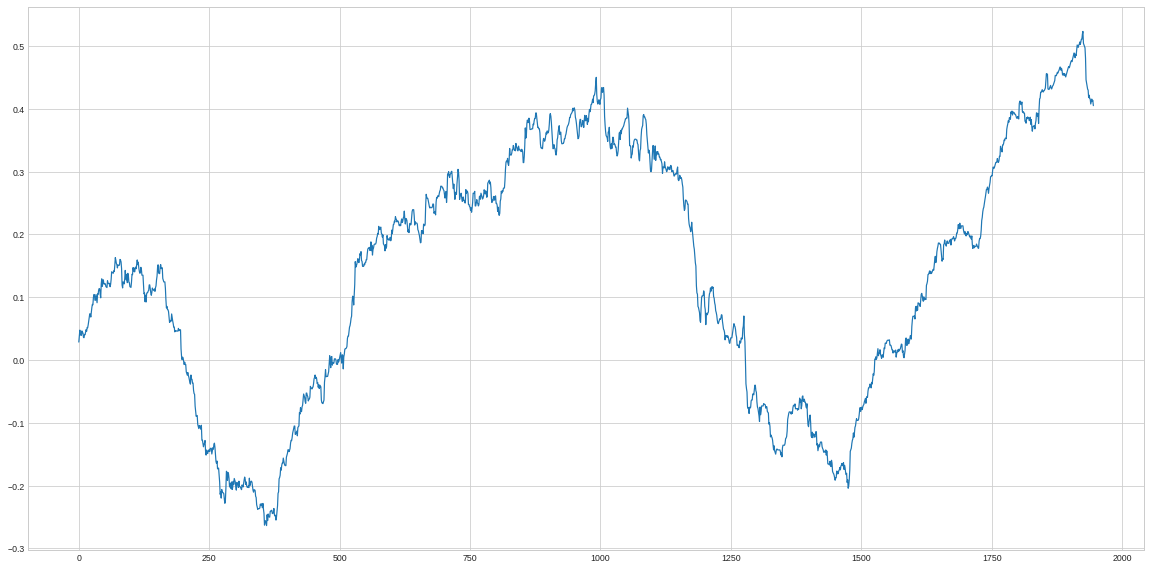

In [ ]:
corpus_dt['cdickens_achristmascarol']['jockersrinker'].rolling(200, center=True, min_periods=0).mean().plot()

In [ ]:
# Read Lexicon into DataFrame 

if SentimentR_Arc == True:

  lexicon_sentimentr_df = get_lexicon(f'/gdrive/MyDrive/{lexicons_subdir}/hash_sentiment_sentimentr.csv')
  lexicon_sentimentr_df['x'] = lexicon_sentimentr_df['x'].astype('string')

  # Clean/Reorg DataFrame
  lexicon_sentimentr_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
  lexicon_sentimentr_df.rename(columns={'x':'word', 'y':'polarity'}, inplace=True)

  # Verify
  if (PLOT_OUTPUT == 'All'):
    lexicon_sentimentr_df.head()
    lexicon_sentimentr_df.info()

### Heuristic Models

In [ ]:
models_heuristic_ls


['vader',
 'bing_sentimentr',
 'sentiword_sentimentr',
 'senticnet_sentimentr',
 'lmcd_sentimentr',
 'jockers_sentimentr',
 'jockersrinker_sentimentr']

#### VADER

### Tradtional ML Models

In [ ]:
models_tradml_ls

['logreg',
 'logreg_cv',
 'multinb',
 'textblob',
 'rf',
 'xgb',
 'flaml',
 'autogluon']

#### Logistic Regression

#### Logistic Regression (Cross Validated)

#### Multinomial Naive Bayes

#### TextBlob

#### Random Forest

#### XGBoost

#### FLAML

#### AutoGluon

### DNN Models

In [ ]:
models_dnn_ls

['fcn', 'lstm', 'cnn', 'stanza', 'flair']

#### FCN

#### LSTM

#### CNN

#### Stanza

#### Flair

### Transformer Models

In [ ]:
models_transformer_ls

['huggingface',
 't5imdb50k',
 'hinglish',
 'yelp',
 'imdb2way',
 'nlptown',
 'robertaxml8lang',
 'roberta15lg']

#### Huggingface Default (huggingface)

#### T5 IDMB 50k Trained (t5imdb50k)

#### Dual Coded English-Hindu (hinglish)

#### Yelp Sentiment Trained model (yelp)

#### IMDB Binary Sentiment Classifier (imdb2way)

#### NLPTown Multilingual (nlptown)

#### RoBERTa XML 8 Multilingual (robertaxml8lang)

#### RoBERTa Large 15 SA DataSets (roberta15lg)

### Create new Mean Cols/Models of Ensemble and Subensembles

In [ ]:
# Create/Update SubEnsemble list of SMAStd Models

models_subensemble_smastd_ls = []

for i,amodel in enumerate(models_subensemble_ls):
  # print(f'Model #{i}: {amodel}')
  amodel_sma = f'{amodel}_sma'
  models_subensemble_smastd_ls.append(amodel_sma)

# models_subensemble_smastd_ls


# Create additional Model column that is the Mean of all Model Sentiment Values
#  Note: Bug in Pandas DataFrame .median() forces use of .mean()

# Only add mean to SubEnsemble if it doesn't already exist
if ('mean_all' in models_ensemble_ls):
  print(f'Model [mean_all] already in Ensemble')
else:
  ensemble_df['mean_all'] = ensemble_df[models_ensemble_ls].mean(axis=1)
  models_ensemble_ls.append('mean_all')
  # models_subensemble_ls.append('mean_all')

# Only add mean to Ensemble if it doesn't already exist
if ('mean_subensem' in ensemble_df.columns):
  print(f'Model [mean] already in SubEnsemble')
else:
  ensemble_df['mean_subensem'] = ensemble_df[models_subensemble_ls].mean(axis=1)
  # models_subensemble_ls.append('mean_subensem')

print(f'\nSubEnsemble Models Selected:')
for i, amodel in enumerate(models_subensemble_ls):
  print(f'  Model #{i}: {amodel}')

print(f'\nAdded Mean Model/Column for ')
print(f'  A Total of {len(models_subensemble_ls)} SubEnsemble Raw Models/Columns')


SubEnsemble Models Selected:
  Model #0: afinn
  Model #1: bing
  Model #2: nrc
  Model #3: syuzhetr
  Model #4: sentimentr
  Model #5: pattern
  Model #6: vader
  Model #7: bing_sentimentr
  Model #8: sentiword_sentimentr
  Model #9: senticnet_sentimentr
  Model #10: lmcd_sentimentr
  Model #11: jockers_sentimentr
  Model #12: jockersrinker_sentimentr
  Model #13: logreg
  Model #14: logreg_cv
  Model #15: multinb
  Model #16: textblob
  Model #17: rf
  Model #18: xgb
  Model #19: flaml
  Model #20: autogluon
  Model #21: fcn
  Model #22: lstm
  Model #23: cnn
  Model #24: stanza
  Model #25: flair
  Model #26: huggingface
  Model #27: t5imdb50k
  Model #28: hinglish
  Model #29: yelp
  Model #30: imdb2way
  Model #31: nlptown
  Model #32: robertaxml8lang
  Model #33: roberta15lg

Added Mean Model/Column for 
  A Total of 34 SubEnsemble Raw Models/Columns


In [ ]:
"""
# Third, Create additional Model column that is the Mean of all Model Sentiment Values
#  Note: Bug in Pandas DataFrame .median() forces use of .mean()

# Only add mean to SubEnsemble if it doesn't already exist
if ('mean_all' in models_ensemble_ls):
  print(f'Model [mean_all] already in Ensemble')
else:
  ensemble_df['mean_all'] = ensemble_df[models_ensemble_ls].mean(axis=1)
  models_ensemble_ls.append('mean_all')
  # models_subensemble_ls.append('mean_all')

# Only add mean to Ensemble if it doesn't already exist
if ('mean_subensem' in ensemble_df.columns):
  print(f'Model [mean] already in SubEnsemble')
else:
  ensemble_df['mean_subensem'] = ensemble_df[models_subensemble_ls].mean(axis=1)
  # models_subensemble_ls.append('mean_subensem')

print(f'\nSubEnsemble Models Selected:')
for i, amodel in enumerate(models_subensemble_ls):
  print(f'  Model #{i}: {amodel}')

print(f'\nAdded Mean Model/Column for ')
print(f'  A Total of {len(models_subensemble_ls)} SubEnsemble Raw Models/Columns')
""";

In [ ]:
# Show just the SubEnsemble Cols/Models

# ensemble_df[models_subensemble_ls].head()

## Recompute Means

### [OPTIONAL] Delete OLD Means if they Exist:

* NOTE: This may result in errors if no proir 'Mean' Cols exist

In [ ]:
models_ensemble_ls

['afinn',
 'bing',
 'nrc',
 'syuzhetr',
 'sentimentr',
 'pattern',
 'vader',
 'bing_sentimentr',
 'sentiword_sentimentr',
 'senticnet_sentimentr',
 'lmcd_sentimentr',
 'jockers_sentimentr',
 'jockersrinker_sentimentr',
 'logreg',
 'logreg_cv',
 'multinb',
 'textblob',
 'rf',
 'xgb',
 'flaml',
 'autogluon',
 'fcn',
 'lstm',
 'cnn',
 'stanza',
 'flair',
 'huggingface',
 't5imdb50k',
 'hinglish',
 'yelp',
 'imdb2way',
 'nlptown',
 'robertaxml8lang',
 'roberta15lg']

In [ ]:
# Debug: remove previously calcumalted means

# Remove means from models_ensemble__ls

try:
  models_ensemble_ls.remove('mean_all')
except:
  print(f"[mean_all] does not exist in [models_ensemble_ls], no need to delete")


try:
  models_subensemble_ls.remove('mean_subensem')
except:
  print(f"[mean_subensem] does not exist in [models_ensemble_ls], no need to delete")

print('\n')

# Remove means from ensemble_df

try:
  ensemble_df.drop(columns=['mean_all'], inplace=True)
except:
  print(f"[mean_all] does not exist in [ensemble_df], no need to delete")


try:
  ensemble_df.drop(columns=['mean_subensem'],inplace=True)
except:
  print(f"[mean_all] does not exist in [ensemble_df], no need to delete")

[mean_all] does not exist in [models_ensemble_ls], no need to delete
[mean_subensem] does not exist in [models_ensemble_ls], no need to delete


[mean_all] does not exist in [ensemble_df], no need to delete
[mean_all] does not exist in [ensemble_df], no need to delete


# **[STEP 6] Smooth and Standardize All Sentiment Time Series**

## [INPUT] SMA Smooth Raw Sentiment Values for All Models

In [ ]:
# ensemble_df.info()

In [ ]:
# models_ensemble_ls

In [ ]:
# Optional: Drop _sma columns to recalculate

# Drop OLD _sma Cols/Models if they exist
# ensemble_df = ensemble_df.loc[:, ~ensemble_df.columns.str.contains("_sma")]
# ensemble_df.info()

In [ ]:
# ensemble_df.info()

In [ ]:
# BUG in pandas. rolling().median and rolling().apply(np.median) result in step functions 

# ensemble_df['roberta15lg'].rolling(win_size, center=True,min_periods=0).median(axis=1).plot() # apply(np.mean).plot()
# ensemble_df['roberta15lg'].rolling(win_size, center=True,min_periods=0).median().plot() # apply(np.mean).plot()
# ensemble_df['roberta15lg'].rolling(win_size, center=True,min_periods=0).apply(np.median).plot() # apply(np.mean).plot()

# Mean() works fine 
# Note: cannot use mean(axis=1)
# ensemble_df['roberta15lg'].rolling(win_size, center=True,min_periods=0).mean().plot() # apply(np.mean).plot()
# ensemble_df['roberta15lg'].rolling(win_size, center=True,min_periods=0).apply(np.mean).plot() # apply(np.mean).plot()

In [ ]:
# models_ensemble_ls.remove('mean_all')

In [ ]:
# plt.style.available

In [ ]:
# plt.style.use('seaborn-whitegrid')

In [ ]:
#@markdown Enter SMA window size as a Percent of total Corpus Length

Window_Percent = 10 #@param {type:"slider", min:1, max:30, step:1}

win_size = int(Window_Percent/100 * ensemble_df.shape[0])

# Drop OLD _sma Cols/Models if they exist
ensemble_df = ensemble_df.loc[:, ~ensemble_df.columns.str.contains("_sma")]

# Remove OLD Mean of Ensemble if it exists
try:
  models_ensemble_ls.remove('mean_all')
  print('OLD Ensemble Mean deleted')
except:
  print('No OLD Ensemble Mean to delete')

plt.figure(figsize=(20,10))

models_subensemble_sma_ls = []
# If does not exist, calculate ensemble sma mean (SMA)
if ~ensemble_df.columns.str.contains('_sma').any():
  for acol in models_ensemble_ls:
    acol_sma = f'{acol}_sma'
    ensemble_df[acol_sma] = ensemble_df[acol].rolling(win_size, center=True, min_periods=0).mean()
    models_subensemble_sma_ls.append(acol_sma)
  # Also calculate the mean for the SubEnsemble
  ensemble_df['mean_subensem_sma'] = ensemble_df[models_subensemble_sma_ls].mean()



# Plot the SMA (*_sma columns) SentimentArcs for Ensemble Models
for acol in models_subensemble_ls:
  if acol in models_lexicon_ls:
    alinestyle = 'solid'
  elif acol in models_heuristic_ls:
    alinestyle = 'solid'
  elif acol in models_tradml_ls:
    alinestyle = 'dashdot'
  elif acol in models_dnn_ls:
    alinestyle = 'dotted'
  elif acol in models_transformer_ls:
    alinestyle='dashed'

  acol_sma = f'{acol}_sma'
  ensemble_df[acol_sma].plot(alpha=0.9, label=acol, linewidth=2, linestyle=alinestyle)

plt.grid(True)
plt.title(f'{Novel_Title} \n SentimentArcs for all {len(models_subensemble_ls)} Ensemble Models \n SMA {Window_Percent}% Smoothing but no Standardization', fontsize=20)
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
# plt.legend(title='Model Name', loc='best')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name', fontsize=14)
plt.tight_layout()
plt.show();

## [INPUT] Standardize the SMA Smoothed SentimentArcs

In [ ]:
cols_keep_ls = [x for x in ensemble_df.columns if not 'mean_' in x]
cols_keep_ls

In [ ]:
"""

# Drop all mean_ Cols/Models

# Identify Cols/Models to Keep (non-mean)
cols_keep_ls = [x for x in ensemble_df.columns if not 'mean_' in x]
# cols_keep_ls
# ensemble_df.drop(columns=[])


# Drop mean_ Cols/Models
ensemble_df.drop(ensemble_df.columns.difference(cols_keep_ls), 1, inplace=True)

""";

In [ ]:
# models_subensemble_ls

In [ ]:
# ensemble_df.drop(columns=['mean_subensem_smastd', 'mean_subensem'], inplace=True)

In [ ]:
# plt.style.available

In [ ]:
# plt.style.use('tableau-colorblind10')

In [ ]:
# Select Standardized Method and Standardize all Model Values

#@markdown Select a Standardization Method to Use:

Model_Standardization_Method = "zScore" #@param ["zScore", "MinMax", "Robust"]

# Create Standardized versions of each Model/Column values
# CAUTION: Only run once

# Select a Standardization method = ['zscore','minmax','robust']
# Model_Standardization_Method = 'robust'

if Model_Standardization_Method == 'zScore':
  scaler = StandardScaler()
elif Model_Standardization_Method == 'MinMax':
  scaler = MinMaxScaler()
elif Model_Standardization_Method == 'Robust':
  scaler = RobustScaler()



# Drop all mean_ Cols/Models
# Identify Cols/Models to Keep (non-mean)
cols_keep_ls = [x for x in ensemble_df.columns if not 'mean_' in x]

# Drop mean_ Cols/Models
ensemble_df.drop(ensemble_df.columns.difference(cols_keep_ls), 1, inplace=True)


models_ensemble_smastd_ls = []
# If does not exist, standardize the sma mean (SMA)
if ~ensemble_df.columns.str.contains('mean_subensem_sma').any():
  for acol in models_subensemble_ls:
    acol_sma = f'{acol}_sma'
    acol_smastd = f'{acol}_smastd'
    ensemble_df[acol_smastd] = scaler.fit_transform(ensemble_df[acol_sma].values.reshape(-1,1))
    models_ensemble_smastd_ls.append(acol_smastd)
  # Also calculate the mean_subensem
  # acol_sma = 'mean_subensem_sma'

ensemble_df['mean_subensem_smastd'] = ensemble_df[models_ensemble_smastd_ls].mean(axis=1)
# ensemble_df[models_ensemble_smastd_ls].mean(axis=1).plot()

  # ensemble_df['mean_subensem_smastd'] = scaler.fit_transform(ensemble_df[acol_sma].values.reshape(-1,1))
# ensemble_df.head()
# ensemble_df['mean_subensem_smastd'].plot();

# **Plot SMA Smoothed and Standardized**


In [ ]:
# Confirm Ensemble Models and Optionally Save Plot to File

#@title Plot Save Options:
Save_Plot = True #@param {type:"boolean"}
HiRes_300dpi = True #@param {type:"boolean"}

# ensemble_ls = ensemble_lexicon_ls + ensemble_heuristic_ls + ensemble_tradml_ls + \
#               ensemble_dnn_ls + ensemble_transformer_ls

print(f'Confirm these are the all the Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(models_subensemble_ls):
  print(f'  Model #{i:>2}: {amodel}') # ({models_dt[amodel][1]})')

print(f'\nIf there is an error in these {len(models_subensemble_ls)} models, \n go back and rerun the previous code cells.')

print(f'\n\nNovel: \n\n  {Novel_Title}')

## Plot Mean of SubEnsemble

In [ ]:
# ensemble_df['mean_subensem_smastd'].plot(alpha=0.5, label='mean_smastd', linewidth=5)

# plt.grid(True)
# plt.title(f'{Novel_Title[0]} \n Sentiment Analysis \n SMA {Window_Percent}% Smoothing then {Model_Standardization_Method} Standardization', fontsize=20)
# plt.title(f'{Novel_Title} \n SentimentArcs for {len(models_subensemble_ls)} Models \n SMA {Window_Percent}% Smoothing then {Model_Standardization_Method} Standardization', fontsize=20)


atitle = f'{Novel_Title} \n Sentiment Analysis Mean of 34 Model Ensemble \n SMA ({Window_Percent}%) then {Model_Standardization_Method} Standardization'
ensemble_df['mean_subensem_smastd'].plot(title = atitle)
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)

# plt.legend(title='Model Name', loc='best', fontsize=14)
# lgd = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name', facecolor='white', framealpha=1) # , prop={"size":16})
# plt.tight_layout()
# plt.tight_layout()

if Save_Plot:
  a_fig = 'fig_y_y_y'
  # get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)
  if HiRes_300dpi:
    #fig.set_size_inches(30.,18.)
    # figsize_tup = (40,20)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', fig_no=a_fig, first_note=f'{len(models_subensemble_ls)}models_mean', last_note=f'sma{Window_Percent}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=300)
    print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
  else:
    # figsize_tup = (20,10)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', fig_no=a_fig, first_note=f'{len(models_subensemble_ls)}models_mean', last_note=f'sma{Window_Percent}_100dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=100)
    print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')

plt.show();

## Plot ALL Models in SubEnsemble

In [ ]:
# models_ensemble_smastd_ls = [x for x in ensemble_df.columns if x.endswith('_smastd')]
# models_ensemble_smastd_ls

In [ ]:
# temp_ls

In [ ]:
# nsemble_df.info(verbose=True)

In [ ]:
# Plot ALL Models in SubEnsembles (Smoothed and Standardized)

models_ensemble_smastd_ls = [x for x in ensemble_df.columns if x.endswith('_smastd')]
temp_ls = models_ensemble_smastd_ls + ['mean_subensem_smastd']

# atitle = f'{Novel_Title} \n Sentiment Analysis of 34 Models Ensemble \n SMA ({Window_Percent}%) then {Model_Standardization_Method} Standardization'
# ensemble_df[temp_ls].plot(title = atitle)

#plt.figure(figsize=(20,10))

# Plot the SMA (*_sma columns) SentimentArcs for Ensemble Models
for arawcol in temp_ls:
  # print(f'arawcol: {arawcol}')
  acol = '_'.join(arawcol.split('_')[:-1])
  # print(f'acol: {acol}')
  if acol in models_lexicon_ls:
    alinestyle = 'solid'
  elif acol in models_heuristic_ls:
    alinestyle = 'solid'
  elif acol in models_tradml_ls:
    alinestyle = 'dashdot'
  elif acol in models_dnn_ls:
    alinestyle = 'dotted'
  elif acol in models_transformer_ls:
    alinestyle='dashed'

  acol_sma = f'{acol}_smastd'
  ensemble_df[acol_sma].plot(alpha=0.9, label=acol, linewidth=2, linestyle=alinestyle)

plt.grid(True)
lgd = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name', facecolor='white', framealpha=1)
plt.title(f'{Novel_Title} \n Sentiment Analysis of All 34 Models in Ensemble \n SMA ({Window_Percent}%) then {Model_Standardization_Method} Standardization')

plt.xlabel('Sentence Number')
plt.ylabel('Sentiment')



# plt.legend(title='Model Name', loc='best', fontsize=14)
# lgd = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name', facecolor='white', framealpha=1) # , prop={"size":16})
# plt.tight_layout()
# plt.tight_layout()

if Save_Plot:
  a_fig = 'fig_y_y_y'
  # get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)
  if HiRes_300dpi:
    #fig.set_size_inches(30.,18.)
    # figsize_tup = (40,20)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', fig_no=a_fig, first_note=f'{len(models_subensemble_ls)}models_all', last_note=f'sma{Window_Percent}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=300)
    print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
  else:
    # figsize_tup = (20,10)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', fig_no=a_fig, first_note=f'{len(models_subensemble_ls)}models_all', last_note=f'sma{Window_Percent}_100dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=100)
    print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')

plt.show();


# ensemble_df['mean_subensem_smastd'].plot()  sentiword_sentimentr_smastd


In [ ]:
# plt.style.available

In [ ]:
# plt.style.use('tableau-colorblind10')
# plt.style.use('seaborn-notebook')
# plt.style.use('seaborn-whitegrid')

In [ ]:
# models_ensemble_smastd_ls

In [ ]:
"""

plt.figure(figsize=(20,10))
ensemble_df[models_ensemble_smastd_ls].mean(axis=1).plot();

# ensemble_df['mean_subensem_smastd'].plot()
plt.title(f'{Novel_Title}\n Sentiment of Mean Ensemble (34 Models)\SMA ({Window_Percent}%)', fontsize=20)
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)

""";

In [ ]:
# ensemble_df.info(verbose=True)

In [ ]:
# models_subensemble_ls

## [SKIP] Experimental Plots

### Compare Raw, SMA, SMA+Standardization



In [ ]:
# Compare all three plots for a given Model

model_str = 'vader'

plt.figure(figsize=(20,10))

ensemble_df[model_str].plot(label='None (raw)', color='blue', alpha=0.3)
ensemble_df[f'{model_str}_sma'].plot(label=f'SMA {Window_Percent}%', color='orange', alpha=0.5, linewidth=5)
ensemble_df[f'{model_str}_smastd'].plot(label=f'SMA then {Model_Standardization_Method}', color='black', alpha=0.7, linewidth=3)

plt.grid(True)
plt.title(f'{Novel_Title} \n SentimentArcs for {model_str.upper()} Model \n Three different Processing Methods', fontsize=20)
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
plt.legend(title='Processing Method', loc='best', fontsize=14)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name')
plt.tight_layout()
plt.show();

### Compare Three Standardization Methods

In [ ]:
models_key_str

In [ ]:
# Compare 3 Standardization Methods with (a)Standardization then (b)SMA Smoothing

model_str = col_base_model
# model_str = 'vader' # model_focus_str # 'vader'

win_per = 10
win_size = int(win_per/100 * ensemble_df.shape[0])

plot_stdsma_fl = False
plot_smastd_fl = True

temp_df = pd.DataFrame()
temp_df['model'] = ensemble_df[model_str].copy(deep=True)
temp_df['model_sma'] = temp_df['model'].rolling(win_size, center=True, min_periods=0).mean()

rscaler = RobustScaler()
temp_df['robust'] = rscaler.fit_transform(temp_df['model'].values.reshape(-1,1)).flatten()
temp_df['sma_robust'] = rscaler.fit_transform(temp_df['model_sma'].values.reshape(-1,1)).flatten()


mmscaler = MinMaxScaler()
temp_df['minmax'] = mmscaler.fit_transform(temp_df['model'].values.reshape(-1,1)).flatten()
temp_df['sma_minmax'] = mmscaler.fit_transform(temp_df['model_sma'].values.reshape(-1,1)).flatten()


scaler = StandardScaler()
temp_df['zscore'] = scaler.fit_transform(temp_df['model'].values.reshape(-1,1)).flatten()
temp_df['sma_zscore'] = scaler.fit_transform(temp_df['model_sma'].values.reshape(-1,1)).flatten()

plt.figure(figsize=(20,10))

if plot_smastd_fl:
  temp_df['sma_robust'].plot(label='SMA+Robust')
  temp_df['sma_minmax'].plot(label='SMA+MinMax')
  temp_df['sma_zscore'].plot(label='SMA+zScore')

if plot_stdsma_fl:
  temp_df['robust'].rolling(win_size, center=True, min_periods=0).mean().plot(label='Robust+SMA', color='orange', linewidth=5, alpha=0.3)
  temp_df['minmax'].rolling(win_size, center=True, min_periods=0).mean().plot(label='MinMax+SMA', color='blue', linewidth=5, alpha=0.3)
  temp_df['zscore'].rolling(win_size, center=True, min_periods=0).mean().plot(label='zScore+SMA', color='black', linewidth=5, alpha=0.3)

plt.grid(True)
plt.title(f'{Novel_Title} \n SentimentArcs for {model_str.capitalize()} Model \n Compare Three different Standardization Methods AFTER SMA Smoothing', fontsize=20)
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
plt.legend(title='Processing Method', loc='best', fontsize=14)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name')
plt.tight_layout()
plt.show();

In [ ]:
# Compare 3 Standardization Methods with (a)SMA Smoothing then (b)Standardization

model_str = col_base_model

win_per = 10
win_size = int(win_per/100 * ensemble_df.shape[0])

plot_stdsma_fl = True
plot_smastd_fl = False

temp_df = pd.DataFrame()
temp_df['model'] = ensemble_df[model_str].copy(deep=True)
temp_df['model_sma'] = temp_df['model'].rolling(win_size, center=True, min_periods=0).mean()

rscaler = RobustScaler()
temp_df['robust'] = rscaler.fit_transform(temp_df['model'].values.reshape(-1,1)).flatten()
temp_df['sma_robust'] = rscaler.fit_transform(temp_df['model_sma'].values.reshape(-1,1)).flatten()


mmscaler = MinMaxScaler()
temp_df['minmax'] = mmscaler.fit_transform(temp_df['model'].values.reshape(-1,1)).flatten()
temp_df['sma_minmax'] = mmscaler.fit_transform(temp_df['model_sma'].values.reshape(-1,1)).flatten()


scaler = StandardScaler()
temp_df['zscore'] = scaler.fit_transform(temp_df['model'].values.reshape(-1,1)).flatten()
temp_df['sma_zscore'] = scaler.fit_transform(temp_df['model_sma'].values.reshape(-1,1)).flatten()

plt.figure(figsize=(20,10))

if plot_smastd_fl:
  temp_df['sma_robust'].plot(label='SMA+Robust')
  temp_df['sma_minmax'].plot(label='SMA+MinMax')
  temp_df['sma_zscore'].plot(label='SMA+zScore')

if plot_stdsma_fl:
  temp_df['robust'].rolling(win_size, center=True, min_periods=0).mean().plot(label='Robust+SMA', color='orange', linewidth=5, alpha=0.3)
  temp_df['minmax'].rolling(win_size, center=True, min_periods=0).mean().plot(label='MinMax+SMA', color='blue', linewidth=5, alpha=0.3)
  temp_df['zscore'].rolling(win_size, center=True, min_periods=0).mean().plot(label='zScore+SMA', color='black', linewidth=5, alpha=0.3)

plt.grid(True)
plt.title(f'{Novel_Title} \n SentimentArcs for {model_str.upper()} Model \n Compare Three different Standardization Methods AFTER SMA Smoothing', fontsize=20)
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
plt.legend(title='Processing Method', loc='best', fontsize=14)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name')
plt.tight_layout()
plt.show();

# Save Checkpoint: SMA Smoothed and Standardized

In [ ]:
# ??get_fullpath

In [ ]:
file_fullpath

In [ ]:
file_fullpath.split('[') # [-1][:-1]

In [ ]:
# Save newly cleaned (Smoothed then Standardized) Ensemble Model data

# file_fullpath = get_fullpath(ftype='data_clean', novel_title=Novel_Title, std_method=Model_Standardization_Method, win_per = Window_Percent, no_date=False)

file_fullpath = get_fullpath(ftype='data_clean')
ensemble_df.to_csv(file_fullpath)

print(f'Saved to file: {file_fullpath}\n\n')

# Verify saved file contents
!head -n 10 $file_fullpath

# Temp Fix:
# file_fullpath = file_fullpath.split('[')[-1][:-1]
# file_fullpath

# ensemble_df.to_csv(file_fullpath)

# print(f'Saved to file: {file_fullpath}')

# **[STEP 7]**

# Compute LOWESS Smoothing and Standardization



## Utility Functions

In [ ]:
def get_lowess_sma(adf, acol, awin_per=10, afrac=0.08):
  '''
  Given a DataFrame, Column Name and Frac float
  Return an (n x 2)np.array of LOWESS x,y smoothed values and SMA y_sma values
  '''

  # win_per = 10 # SMA window as % of corpus length
  win_size = int(awin_per/100*adf.shape[0])
  
  # Generate data looking like cosine
  x = adf.index # np.random.uniform(0, 4 * np.pi, size=200)
  # Experiment: apply LOWESS smoothing after SMA smoothing
  y_sma = adf[acol].rolling(win_size, center=True, min_periods=0).mean().values # np.cos(x) + np.random.random(size=len(x))
  y = adf[acol]

  # Compute a lowess smoothing of the data
  smoothed = sm.nonparametric.lowess(exog=x, endog=y, frac=afrac)

  return x, y, y_sma, smoothed

In [ ]:
temp_ls = []

subset_models_ls = ['_'.join(x.split('_')[:-1]) for x in ensemble_df.columns if '_lowess' in x]

for amodel in subset_models_ls:
  amodel_str = f'"{amodel}"'
  temp_ls.append(amodel_str)

subset_models_str = ','.join(temp_ls)
subset_models_str

In [ ]:
# ensemble_df.info(verbose=True)

In [ ]:
# Drop old smoothed values of _lowess (if they exist)

ensemble_df.drop(columns=[x for x in ensemble_df.columns if x.endswith('lowess')], inplace=True)

## Compute LOWESS Values

In [ ]:
ensemble_df.columns.str.contains('_lowessstd').any()

In [ ]:
# Compute LOWESS smoothed and LOWESS smoothed+Standardized time series in ensemble DataFrame

# novel_lowess_dt = {}
model_labels_dt = {}

# If does not exist, calculate LOWESS(*_lowess) and LOWESS+Standardized(*_stdlowess) values/columns
if True: # ~ensemble_df.columns.str.contains('_lowessstd').any():
  for i, amodel in enumerate(models_subensemble_ls):
    print(f'Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model #{i:>2}: {amodel}')
    lowess_frac = 1./int(LOWESS_Fraction)
    amodel_smastd = f'{amodel}_smastd'
    amodel_lowess = f'{amodel}_lowess'
    amodel_lowessstd = f'{amodel}_lowessstd'

    # KEY DECISION: (LOWESS of SMA+STD:amodel_stdsma) > (LOWESS of RAW+STD:amodel)
    # _, _, _, smoothed = get_lowess(ensemble_df, amodel, awin_per=Window_Percent, afrac=lowess_frac)
    _, _, _, smoothed = get_lowess_sma(ensemble_df, amodel_smastd, awin_per=Window_Percent, afrac=lowess_frac)
    x_vals = smoothed[:, 0]
    y_vals = smoothed[:, 1]
    # novel_lowess_dt[amodel] = (x_vals, y_vals)
    ensemble_df[amodel_lowess] = pd.Series(y_vals)
    ensemble_df[amodel_lowessstd] = scaler.fit_transform(ensemble_df[amodel_lowess].values.reshape(-1,1))

# Plot LOWESS Smoothing and Standardization



## Plot Individual Model within Ensemble

In [ ]:
# Get list and string for all LOWESS smoothed SMA+STD Arcs

lowessstd_ls = [x for x in ensemble_df.columns if x.endswith('_lowessstd')]

lowessstd_str = ','.join([f"'{x}'" for x in lowessstd_ls if x.endswith('_lowessstd')])
lowessstd_str

In [ ]:
# EDA plot of LOWESS Smoothed Standardized+SMA SentimentArcs by Model Family

#@markdown Select which Model to Plot LOWESS Smoothed of SMA+STD:

Model_Name = "roberta15lg_lowessstd" #@param ['afinn_lowessstd','bing_lowessstd','nrc_lowessstd','syuzhetr_lowessstd','sentimentr_lowessstd','pattern_lowessstd','vader_lowessstd','bing_sentimentr_lowessstd','sentiword_sentimentr_lowessstd','senticnet_sentimentr_lowessstd','lmcd_sentimentr_lowessstd','jockers_sentimentr_lowessstd','jockersrinker_sentimentr_lowessstd','logreg_lowessstd','logreg_cv_lowessstd','multinb_lowessstd','textblob_lowessstd','rf_lowessstd','xgb_lowessstd','flaml_lowessstd','autogluon_lowessstd','fcn_lowessstd','lstm_lowessstd','cnn_lowessstd','stanza_lowessstd','flair_lowessstd','huggingface_lowessstd','t5imdb50k_lowessstd','hinglish_lowessstd','yelp_lowessstd','imdb2way_lowessstd','nlptown_lowessstd','robertaxml8lang_lowessstd','roberta15lg_lowessstd'] 
# Novel_Name = {Novel_Title[0]} #@param [Novel_Title[0]]

#@markdown Confirm Ensemble SentimentArcs and Option to Saved:
# Save_Plot = True #@param {type:"boolean"}
# HiRes_300dpi = True #@param {type:"boolean"}


# plt.figure(figsize=(20,10))

ensemble_df[Model_Name].plot()

# plt.grid(True)
plt.title(f'{Novel_Title} \n Sentiment Model {" ".join(Model_Name.split("_")[:-1]).capitalize()} \n LOWESS frac={LOWESS_Fraction} Smoothing then {Model_Standardization_Method} Standardized then SMA {Window_Percent}%', fontsize=20)
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
# plt.legend(title='Model Name', loc='best')
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name')
plt.tight_layout()

if Save_Plot:
  # get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)
  if HiRes_300dpi:
    # fig.set_size_inches(30.,18.)
    # figsize_tup = (40,20)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'{Model_Name.lower()}', last_note=f'lowess{LOWESS_Fraction}_of_{Model_Standardization_Method}_SMA{Window_Percent}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=300)
    print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
  else:
    # figsize_tup = (20,10)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'{Model_Name.lower()}', last_note=f'lowess{LOWESS_Fraction}_of_{Model_Standardization_Method}_SMA{Window_Percent}__100dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=100)
    print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')

plt.show();


## Plot ALL Models in SubEnsemble

In [ ]:
# EDA plot of All LOWESS Smoothed Standardized+SMA SentimentArcs by Model Family

#@markdown Confirm Ensemble SentimentArcs and Option to Saved:
Save_Plot = True #@param {type:"boolean"}
HiRes_300dpi = True #@param {type:"boolean"}

plt.figure(figsize=(20, 10))

lowessstd_ls = [x for x in ensemble_df.columns if x.endswith('_lowessstd')]

# ax, fig = plt.subplot()

for i, an_arc in enumerate(lowessstd_ls):

  acol = '_'.join(an_arc.split('_')[:-1])
  if acol in models_lexicon_ls:
    alinestyle = 'solid'
  elif acol in models_heuristic_ls:
    alinestyle = 'solid'
  elif acol in models_tradml_ls:
    alinestyle = 'dashdot'
  elif acol in models_dnn_ls:
    alinestyle = 'dotted'
  elif acol in models_transformer_ls:
    alinestyle='dashed'

  #   acol_sma = f'{acol}_smastd'
  #   ensemble_df[acol_sma].plot(alpha=0.9, label=acol, linewidth=2, linestyle=alinestyle)

  # an_arc_clean = '_'.join(an_arc.split('_')[:-1])
  ensemble_df[an_arc].plot(label=acol, alpha=0.9, linestyle=alinestyle)

# plt.title(f'{Novel_Title[0]} \n Sentiment Analysis \n LOWESS with {Model_Standardization_Method} Standardization')

lgd = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='LOWESS Smoothing + zScore', prop={"size":10})
# plt.tight_layout()
plt.tight_layout()

# plt.autoscale(enable=True, axis="x", tight=True)
# plt.grid(True, alpha=0.3)


plt.title(f'{Novel_Title} \n SentimentArcs for All {len(models_subensemble_ls)} Models in Ensemble Models \n LOWESS frac={LOWESS_Fraction} Smoothing of {Model_Standardization_Method} Standardized SMA {Window_Percent}', fontsize=20)
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
# plt.legend(title='Model Name', loc='upper right', fontsize=12)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name')
# plt.tight_layout()

if Save_Plot:
  # get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)
  if HiRes_300dpi:
    # fig.set_size_inches(30.,18.)
    # figsize_tup = (40,20)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', fig_no='fig_y_y_y', first_note=f'lowess{LOWESS_Fraction}_of_{Model_Standardization_Method}_SMA{Window_Percent}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=300)
    print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
  else:
    # figsize_tup = (20,10)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', fig_no='fig_y_y_y', first_note=f'lowess{LOWESS_Fraction}_of_{Model_Standardization_Method}_SMA{Window_Percent}__100dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=100)
    print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')

plt.show();



**[SKIP] to next section**

## Plot a Family of Models

In [ ]:
# EDA plot of LOWESS Smoothed Standardized+SMA SentimentArcs by Model Family

#@markdown Select which Model Family to Plot LOWESS Smoothed of SMA+STD:

Model_Family = "transformer" #@param ["lexicon", "heuristic", "tradml", "dnn", "transformer"]

#@markdown Confirm Ensemble SentimentArcs and Option to Saved:
Save_Plot = True #@param {type:"boolean"}
HiRes_300dpi = True #@param {type:"boolean"}

stdlowess_ls = [x for x in ensemble_df.columns if x.endswith('_stdlowess')]

# Select which family to Plot
plot_family = ['lexicon','heuristic','tradml','dnn','transformer']

plt.figure(figsize=(20,10))

# Plot the LOWESS+Standardized (*_stdlowess columns) SentimentArcs for Ensemble Models
for acol in models_ensemble_ls:
  # print(f'Processing Model: {acol}')
  if (acol in models_lexicon_ls) & (Model_Family == 'lexicon'):
    cols_family_ls = models_lexicon_ls
    alinestyle = 'solid'
    acol_lowessstd = f'{acol}_lowessstd'
    ensemble_df[acol_lowessstd].plot(alpha=0.5, label=acol_lowessstd, linewidth=2, linestyle=alinestyle)
  elif (acol in models_heuristic_ls) & (Model_Family == 'heuristic'):
    cols_family_ls = models_heuristic_ls
    alinestyle = 'solid'
    # Catch exception with LOWESS error on lmcd_sentimentr (too many zero values?)
    # BUGFIX for lmcd_sentimentr, works with LOWESS smoothing of STD+SMA
    # if acol.startswith('lmcd_sentimentr'):
    if acol.startswith('execute_else_stmt'):
      # Keep this error check inplace in case future novels/models/params replicate this problem
      continue
    else:
      acol_lowessstd = f'{acol}_lowessstd'
      ensemble_df[acol_lowessstd].plot(alpha=0.5, label=acol_lowessstd, linewidth=2, linestyle=alinestyle)
  elif (acol in models_tradml_ls) & (Model_Family == 'tradml'):
    cols_family_ls = models_tradml_ls
    alinestyle = 'dashdot'
    acol_lowessstd = f'{acol}_lowessstd'
    ensemble_df[acol_lowessstd].plot(alpha=0.5, label=acol_lowessstd, linewidth=2, linestyle=alinestyle)
  elif (acol in models_dnn_ls) & (Model_Family == 'dnn'):
    cols_family_ls = models_dnn_ls
    alinestyle = 'dotted'
    acol_lowessstd = f'{acol}_lowessstd'
    ensemble_df[acol_lowessstd].plot(alpha=0.5, label=acol_lowessstd, linewidth=2, linestyle=alinestyle)  
  elif (acol in models_transformer_ls) & (Model_Family == 'transformer'):
    cols_family_ls = models_transformer_ls
    alinestyle='dashed'
    acol_lowessstd = f'{acol}_lowessstd'
    ensemble_df[acol_lowessstd].plot(alpha=0.5, label=acol_lowessstd, linewidth=2, linestyle=alinestyle)

# plt.grid(True, alpha=0.3)
plt.title(f'{Novel_Title} \n SentimentArcs for {len(cols_family_ls)} {Model_Family.capitalize()} Models in Ensemble Models \n LOWESS frac={LOWESS_Fraction} Smoothing of {Model_Standardization_Method} Standardized SMA {Window_Percent}%', fontsize=20)
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
# lgd = plt.legend(title='Model Name', loc='best', fontsize=12)
lgd = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='LOWESS Smoothing + zScore', prop={"size":10})

# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name')
plt.tight_layout()

if Save_Plot:
  # get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)
  if HiRes_300dpi:
    # fig.set_size_inches(30.,18.)
    # figsize_tup = (40,20)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'lowess{LOWESS_Fraction}_of_{Model_Standardization_Method}_SMA{Window_Percent}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=300)
    print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
  else:
    # figsize_tup = (20,10)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'lowess{LOWESS_Fraction}_of_{Model_Standardization_Method}_SMA{Window_Percent}__100dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=100)
    print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')

plt.show();


## [SKIP] Experimental Plots

In [ ]:
amodel = Model_Title
amodel

### LOWESS vs LOWESS plus Standardization

In [ ]:
# EDA comparison for VADER LOWESS vs LOWESS+Standardization
#   Standardization NOT needed since LOWESS is smoothing an already Standardized SMA+STD Arc

plt.figure(figsize=(20,10))

col_lowess = f'{amodel}_lowess'
col_lowessstd = f'{amodel}_lowessstd'

ensemble_df[col_lowess].plot(label=f'{amodel.capitalize()} LOWESS')
ensemble_df[col_lowessstd].plot(label=f'{amodel.capitalize()} LOWESS+{Model_Standardization_Method}')
plt.title(f'{Novel_Title} \n Sentiment Analysis \n LOWESS vs LOWESS with Standardization', fontsize=20)
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
plt.legend(loc='best', fontsize=14)
# plt.grid(True)
plt.show();

### Multi-LOWESS vs SMA

In [ ]:
# Compare SMA vs LOWESS both working on raw time series
# NOTE: Big disagreement 

afrac_ls = [1./6, 1./8, 1./10, 1./12, 1./14, 1./16, 1./18, 1./20]
awin_per = 10

# The ONE Selected Model
# Model_Title = models_dt[Model_Focus][0]
# Model_Title
amodel = Model_Title

# amodel = 'vader_stdsma'
# x, y, y_sma, smoothed = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=afrac)

# plt.figure(figsize=(20,10))

# Plot the fit line
fig, ax = plt.subplots(figsize=(20,10))

# raw_arc = ax.scatter(x, y, color='blue', alpha=0.1)
# sma_arc = ax.scatter(x, y_sma, s=5, color='orange')

# fig.figure(figsize=(20,10))

x, y, y_sma, smoothed5 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./5)
lowess_arc5 = ax.scatter(smoothed5[:, 0], smoothed5[:, 1], s=5, alpha=0.3) # c="grey", s=5)
sma_arc = ax.scatter(x, y_sma, s=5, color='orange')

_, _, _, smoothed8 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./8)
lowess_arc8 = ax.scatter(smoothed8[:, 0], smoothed8[:, 1], s=5, alpha=0.3) # , c="navy", s=5)

_, _, _, smoothed10 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./10)
lowess_arc10 = ax.scatter(smoothed10[:, 0], smoothed10[:, 1], s=5, alpha=0.3) # , c="navy", s=5)

_, _, _, smoothed15 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./15)
lowess_arc15 = ax.scatter(smoothed15[:, 0], smoothed15[:, 1], s=5, alpha=0.3) # , c="navy", s=5)

_, _, _, smoothed20 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./20)
lowess_arc20 = ax.scatter(smoothed20[:, 0], smoothed20[:, 1], s=5, alpha=0.3) # , c="black", s=5)

_, _, _, smoothed30 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./30)
lowess_arc30 = ax.scatter(smoothed30[:, 0], smoothed30[:, 1], s=5, alpha=0.3) # , c="black", s=5)


ax.set_title(f"{Novel_Title} \n Sentiment {amodel.split('_')[0]} \n SMA {awin_per}% vs LOWESS frac=1./[5,8,10,15,20]", fontsize=20)
ax.set_xlabel('Sentence Number', fontsize=14)
ax.set_ylabel('Sentiment', fontsize=14)
plt.legend((sma_arc, lowess_arc5, lowess_arc8, lowess_arc10, lowess_arc15, lowess_arc20, lowess_arc30), # 
           # (raw_arc, sma_arc, lowess_arc),
           (f'SMA window={awin_per}%', f'LOWESS frac={1./5:.2f}', f'LOWESS frac={1./8:.2f}', f'LOWESS frac={1./10:.2f}', f'LOWESS frac={1./15:.2f}', f'LOWESS frac={1./20:.2f}', f'LOWESS frac={1./30:.2f}'),
           # ('Raw Values', f'SMA window={awin_per}%', f'LOWESS frac={afrac:.3f}'),
           scatterpoints=5,
           loc='best',
           # ncol=3,
           fontsize=14)
plt.autoscale(enable=True, axis="x", tight=True)
# plt.grid()
# plt.figure(figsize=(20,10))
plt.show();

### Multi-LOWESS

In [ ]:
# from IPython.core.pylabtools import figsize

# Just Plot LOWESS both working on raw time series
# NOTE: Big disagreement 

afrac_ls = [1./6, 1./8, 1./10, 1./12, 1./14, 1./16, 1./18, 1./20, 1./30]
awin_per = 10

# amodel = 'vader'
# amodel = 'vader_stdsma'
# x, y, y_sma, smoothed = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=afrac)

# plt.figure(figsize=(30,15))

# Plot the fit line
fig, ax = plt.subplots(figsize=(20,10))

# raw_arc = ax.scatter(x, y, color='blue', alpha=0.1)
# sma_arc = ax.scatter(x, y_sma, s=5, color='orange')

x, y, y_sma, smoothed6 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./5)
lowess_arc6 = ax.plot(smoothed6[:, 0], smoothed6[:, 1], label='frac=6', alpha=0.9) # , s=5, alpha=0.3) # c="grey", s=5)

# sma_arc = ax.scatter(x, y_sma, s=5, color='orange')

_, _, _, smoothed8 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./8)
lowess_arc8 = ax.plot(smoothed8[:, 0], smoothed8[:, 1], label='frac=8', alpha=0.9, linestyle='-') # , s=5, alpha=0.3) # , c="navy", s=5)

_, _, _, smoothed10 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./10)
lowess_arc10 = ax.plot(smoothed10[:, 0], smoothed10[:, 1], label='frac=10', alpha=0.9, linestyle='--') # , s=5, alpha=0.3) # , c="navy", s=5)

_, _, _, smoothed12 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./12)
lowess_arc12 = ax.plot(smoothed12[:, 0], smoothed12[:, 1], label='frac=12', alpha=0.9, linestyle=':') # , s=5, alpha=0.3) # , c="navy", s=5)

_, _, _, smoothed14 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./14)
lowess_arc14 = ax.plot(smoothed14[:, 0], smoothed14[:, 1], label='frac=14', alpha=0.9, linestyle='-.') # , s=5, alpha=0.3) # , c="navy", s=5)

_, _, _, smoothed16 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./16)
lowess_arc16 = ax.plot(smoothed16[:, 0], smoothed16[:, 1], label='frac=16', alpha=0.9, linestyle='-') # , s=5, alpha=0.3) # , c="navy", s=5)

_, _, _, smoothed18 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./18)
lowess_arc18 = ax.plot(smoothed18[:, 0], smoothed18[:, 1], label='frac=18', alpha=0.9, linestyle='--') # , s=5, alpha=0.3) # , c="navy", s=5)

_, _, _, smoothed20 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./20)
lowess_arc20 = ax.plot(smoothed20[:, 0], smoothed20[:, 1], label='frac=20', alpha=0.9, linestyle=':') # , s=5, alpha=0.3) # , c="black", s=5)

# _, _, _, smoothed30 = get_lowess_sma(ensemble_df, amodel, awin_per=awin_per, afrac=1./30)
# lowess_arc30 = ax.plot(smoothed30[:, 0], smoothed30[:, 1], label='frac=30', alpha=0.5) # , s=5, alpha=0.3) # , c="black", s=5)


ax.set_title(f"{Novel_Title} \n Sentiment Model {amodel.split('_')[0].capitalize()} \n SMA {awin_per}% vs LOWESS frac=1./[6-30]", fontsize=20)
ax.set_xlabel('Sentence Number', fontsize=14)
ax.set_ylabel('Sentiment', fontsize=14)
# plt.legend((sma_arc, lowess_arc6, lowess_arc8, lowess_arc10, lowess_arc12, lowess_arc14, lowess_arc16, lowess_arc18, lowess_arc20, lowess_arc30), # 
"""
plt.legend((lowess_arc6, lowess_arc8, lowess_arc10, lowess_arc12, lowess_arc14, lowess_arc16, lowess_arc18, lowess_arc20, lowess_arc30), # 
           # (raw_arc, sma_arc, lowess_arc),
           # (f'SMA window={awin_per}%', f'LOWESS frac={1./5:.2f}', f'LOWESS frac={1./8:.2f}', f'LOWESS frac={1./10:.2f}', f'LOWESS frac={1./15:.2f}', f'LOWESS frac={1./20:.2f}', f'LOWESS frac={1./30:.2f}'),
           # (f'LOWESS frac={1./5:.2f}', f'LOWESS frac={1./8:.2f}', f'LOWESS frac={1./10:.2f}', f'LOWESS frac={1./15:.2f}', f'LOWESS frac={1./20:.2f}', f'LOWESS frac={1./30:.2f}'),
           (f'frac=1/6', f'frac=1/8', f'frac=1/10', f'frac=1/12', f'frac=1/14', f'frac=1/16', f'frac=1/18', f'frac=1/20', f'frac=1/30'),
           # ('Raw Values', f'SMA window={awin_per}%', f'LOWESS frac={afrac:.3f}'),
           scatterpoints=5,
           loc='best',
           # ncol=3,
           title='LOWESS Smoothed',
           fontsize=10)
""";
# lgd = plt.legend(loc='best', title='LOWESS Smoothing')

lgd = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='LOWESS Smoothing') # , prop={"size":10})
# plt.tight_layout()
plt.tight_layout()

# plt.autoscale(enable=True, axis="x", tight=True)
# plt.grid(True, alpha=0.3)



# plt.grid(True)
# # plt.title(f'{Novel_Title[0]} \n Sentiment Analysis \n SMA {Window_Percent}% Smoothing then {Model_Standardization_Method} Standardization', fontsize=20)
# plt.title(f'{Novel_Title} \n SentimentArcs for all {len(models_subensemble_ls)} Ensemble Models \n SMA {Window_Percent}% Smoothing then {Model_Standardization_Method} Standardization', fontsize=20)
# plt.xlabel('Sentence Number', fontsize=14)
# plt.ylabel('Sentiment', fontsize=14)

# plt.legend(title='Model Name', loc='best', fontsize=14)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name', prop={"size":16})
# plt.tight_layout()

if Save_Plot:
  # get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)
  if HiRes_300dpi:
    #fig.set_size_inches(30.,18.)
    # figsize_tup = (40,20)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', fig_no='fig_y_y_y', first_note=f'{Novel_Key}', last_note=f'lowess_{amodel}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=300)
    print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
  else:
    # figsize_tup = (20,10)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', fig_no='fig_y_y_y', first_note=f'{len(models_subensemble_ls)}models', last_note=f'sma{Window_Percent}_100dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=100)
    print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')

plt.show();

### LOWESS vs SMA

In [ ]:
# Compare LOWESS smoothed version of SMA Smoothed Standardized Model

#@markdown Compare SMA and LOWESS smoothed values of Model

# Standardized Model Values
# Standardized_Model = "RoBERTa" #@param ["VADER", "TextBlob", "RoBERTa"]

# Simple Moving Average Smoothing Window Size
Window_Percent = 10 #@param {type:"slider", min:1, max:30, step:1}

# LOWESS Smoothing Fraction Size
LOWESS_Fraction = 30 #@param {type:"slider", min:1, max:30, step:1}
# Confirm Ensemble Models and Optionally Save Plot to File

#@markdown Confirm Ensemble SentimentArcs and Option to Saved:
# Save_Plot = True #@param {type:"boolean"}
# HiRes_300dpi = True #@param {type:"boolean"}

# ensemble_ls = ensemble_lexicon_ls + ensemble_heuristic_ls + ensemble_tradml_ls + \
#               ensemble_dnn_ls + ensemble_transformer_ls

# print(f'Confirm these are the all the Model(s) to include in the Ensemble:\n')

# for i, amodel in enumerate(ensemble_ls):
#   print(f'  Model #{i:>2}: {amodel} ({models_dt[amodel][1]})')

# print(f'\nIf there is an error in these {len(ensemble_ls)} models, \n go back and rerun the previous code cells.')

# KEY DECISION: (LOWESS of SMA+STD) > (LOWESS of RAW+STD)
# col_smastd_model = f'{Standardized_Model.lower()}_smastd'
col_smastd_model = f'{amodel}_smastd'
# col_model = f'{Standardized_Model.lower()}'

print(f'Plotting Model: {Standardized_Model}') # col_smastd_model}')
lowess_frac = 1./LOWESS_Fraction

win_size = int(Window_Percent/100 * ensemble_df.shape[0])

# Get LOWESS values
x, y, y_sma, smoothed = get_lowess_sma(ensemble_df, col_smastd_model, awin_per=Window_Percent, afrac=lowess_frac)

# plt.figure(figsize=(30,15))

# Plot the fit line
fig, ax = plt.subplots(figsize=(20,10))

raw_arc = ax.scatter(x, y, label='1-pass SMA 10%', c='blue', alpha=0.1)
sma_arc = ax.scatter(x, y_sma, label='2-pass SMA 10%', c='red', s=5)
lowess_arc = ax.scatter(smoothed[:, 0], smoothed[:, 1], label='LOWESS', c="black", s=5)
ax.set_title(f"{Novel_Title} \n Sentiment {amodel.split('_')[0]} \n 1st Pass: SMA, 2nd Pass: SMA {Window_Percent}% vs LOWESS frac={LOWESS_Fraction}", fontsize=20)
ax.set_xlabel('Sentence Number', fontsize=14)
ax.set_ylabel('Sentiment', fontsize=14)
lgd = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='LOWESS Smoothing', prop={"size":12})
# plt.tight_layout()
plt.tight_layout()

"""
plt.legend((raw_arc, sma_arc, lowess_arc),
           ('SMA 10%', f'2nd Pass: SMA window={Window_Percent}%', f'2nd Pass: LOWESS frac={lowess_frac}'),
           scatterpoints=1,
           loc='best',
           # ncol=3,
           fontsize=14)
""";

# plt.autoscale(enable=True, axis="x", tight=True)
plt.grid(True, alpha=0.3)

"""
plt.grid(True)
# plt.title(f'{Novel_Title[0]} \n Sentiment Analysis \n SMA {Window_Percent}% Smoothing then {Model_Standardization_Method} Standardization', fontsize=20)
plt.title(f'{Novel_Title[0]} \n SentimentArcs for all {len(cols_model_ls)} Ensemble Models \n SMA {Window_Percent}% Smoothing then {Model_Standardization_Method} Standardization', fontsize=20)
plt.xlabel('Sentence Number')
plt.ylabel('Sentiment')
# plt.legend(title='Model Name', loc='best')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name', prop={"size":16})
plt.tight_layout()
""";

if Save_Plot:
  # get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)
  if HiRes_300dpi:
    # fig.set_size_inches(30.,18.)
    # figsize_tup = (40,20)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'sma{Window_Percent}_vs_lowess{LOWESS_Fraction}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=300)
    print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
  else:
    # figsize_tup = (20,10)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'sma{Window_Percent}_vs_lowess{LOWESS_Fraction}_100dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=100)
    print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')

plt.show();



# Save Checkpoint: LOWESS Smoothed and Standardized

In [ ]:
# Save newly cleaned (Smoothed then Standardized) Ensemble Model data

file_fullpath = get_fullpath(ftype='data_clean')
ensemble_df.to_csv(file_fullpath)

print(f'Saved to file: {file_fullpath}')

In [ ]:
# Verify saved file contents

!head -n 10 $file_fullpath

# **[STEP 8]**

# Crux Points and Contexts

## Utility Functions

In [ ]:
def get_crux_context(adf=ensemble_df, acol_sentraw='sent_raw', asent_no=5, ahalf_win=2, do_upper=True):
  '''
  Given a DataFrame with acol_sentraw of Sentence raw text along with
    a crux sent_no and half_win number of sentences on before and after crux point
  Return a list of Sentences that define the (2*ahalf_win + 1) context window around the Crux asent_no
  '''

  context_ls = []

  corpus_len = adf.shape[0]

  # Get lower bound of Crux Context Window
  context_min = asent_no - ahalf_win
  if context_min < 0:
    context_min = 0

  # Get upper bound of Crux Context Window
  context_max = asent_no + ahalf_win + 1 # correct for zero-based indexing 
  if context_max > corpus_len:
    context_max = corpus_len - 1

  lineno_ls = list(range(context_min,context_max))
  context_ls = adf.iloc[context_min:context_max][acol_sentraw].to_list()

  if do_upper:
    # [f(x) if condition else g(x) for x in sequence]
    crux_str = adf.iloc[asent_no][acol_sentraw]
    context_ls = [x.upper() if x == crux_str else x for x in context_ls]

  context_tup_ls = list(zip(lineno_ls, context_ls))

  return context_tup_ls

# Test

temp_tup_ls = get_crux_context(ensemble_df, 'sent_raw', 20, 5)
temp_tup_ls

In [ ]:
def get_crux_points(adf, acol_name, text_type='sentence', win_per=5, sec_y_labels=True, sec_y_height=0, subtitle_str=' ', do_plot=True, save2file=False):
  '''
  Given a DataFrame and a Time Series Column within it and a LOWESS window
  Return a list of Min/Max Crux Point (x,y) coordinate tuples for that Column Time Series
  '''

  # print('entered get_crux_points') 
  crux_ls = []

  series_len = adf.shape[0]
  # print(f'series_len = {series_len}')

  # sent_no_min = adf[].min()
  sent_no_min = 0
  # sent_no_max = adf.sent_no.max()
  sent_no_max = series_len - 1
  # print(f'sent_no_min {sent_no_min}')

  sm_x = adf.index.values
  sm_y = adf[acol_name].values.flatten()

  half_win = int((win_per/100)*series_len)
  # print(f'half_win = {half_win}')
  # print(f'sm_y type = {type(sm_y)}')

  # Find peaks(max).
  # peak_indexes = signal.argrelextrema(sm_y, np.greater, order=half_win, mode='wrap') argrelextrema will not detect flat peaks
  peak_indexes = signal.find_peaks(sm_y, distance=half_win) # np.greater, order=half_win, mode='wrap')
  # peak_indexes = peak_indexes + sent_no_min
  # print(f'peak_indexes[0]: {peak_indexes_np[0]}')
  # print(f'peak_indexes type: {type(peak_indexes_np[0])}')
  # peak_indexes_np = peak_indexes_np + sent_no_min
  # print(f'peak_indexes type = {type(peak_indexes)}') # sent_no_start sent
  peak_indexes = peak_indexes[0]

  peak_x_ls = list(peak_indexes)
  peak_x_adj_ls = [x+sent_no_min for x in peak_x_ls]

  peak_y_ls = list(sm_y[peak_indexes])

  peak_label_ls = ['peak'] * len(peak_y_ls)
  peak_coord_ls = tuple(zip(peak_label_ls, peak_x_adj_ls, peak_y_ls))

  # peak_y_all_ls = peak_y_ls + valley_y_ls
  # crux_coord_ls = tuple(zip(x_all_ls, y_all_ls)) 

  # Find valleys(min).
  # valley_indexes = signal.argrelextrema(sm_y, np.less, order=half_win, mode='clip')
  valley_indexes = signal.find_peaks(-sm_y, distance=half_win)
  valley_indexes = valley_indexes[0]
  
  valley_x_ls = list(valley_indexes)
  valley_x_adj_ls = [x+sent_no_min for x in valley_x_ls]

  valley_y_ls = list(sm_y[valley_indexes])

  valley_label_ls = ['valley'] * len(valley_y_ls)
  valley_coord_ls = tuple(zip(valley_label_ls, valley_x_adj_ls, valley_y_ls))

  # Combine Peaks and Valley Coordinates into List of Tuples(label, x_coord, y_coord)
  crux_coord_ls = peak_coord_ls + valley_coord_ls


  if do_plot == True:

    # plt.figure(figsize=(20,10))

    # Plot main graph.
    (fig, ax) = plt.subplots(figsize=(20,10))
    ax.plot(sm_x, sm_y)
    # plt.figure(figsize=(20,10))

    plt.xlim([0, len(sm_x)])

    # corpus_sects_df
    if sec_y_labels == True:
      section_sent_no_boundries_ls = list(corpus_sects_df['sent_no_start'])
      section_no_ls = list(corpus_sects_df['sect_no'])
      for i, asect_no in enumerate(section_sent_no_boundries_ls):
        # Plot vertical lines for section boundries
        plt.text(asect_no, sec_y_height, f'Section #{section_no_ls[i]}', alpha=0.2, rotation=90)
        plt.axvline(asect_no, color='blue', alpha=0.1)    


    win_half = 0 # 2500

    # Plot peaks.
    # ax.plot(peak_x + win_half, peak_y, marker='o', linestyle='none', color='green', label="Peaks")

    # readjust starting Sentence No to start with first sentence in segement window
    peak_x_ls = [x+sent_no_min for x in peak_x_ls]
    ax.scatter(peak_x_ls, peak_y_ls)
    for i, txt in enumerate(list(peak_x_ls)):
        ax.annotate(f'  Sent #{txt}', (peak_x_ls[i], peak_y_ls[i]), rotation=90, ha='center', va='bottom', annotation_clip=True)

    # Plot valleys.
    # ax.plot(valley_x + win_half, valley_y, marker='o', linestyle='none', color='red', label="Valleys")
    # readjust starting Sentence No to start with first sentence in segement window
    valley_x_ls = [x+sent_no_min for x in valley_x_ls]
    ax.scatter(valley_x_ls, valley_y_ls)
    for i, txt in enumerate(list(valley_x_ls)):
        ax.annotate(f'Sent #{txt}', (valley_x_ls[i], valley_y_ls[i]), rotation=270, ha='center', va='top', annotation_clip=True) # xytext=(valley_x_ls[i], valley_y_ls[i]-4))

    # for i, txt in enumerate(list(valley_x_ls)):
    #     ax.annotate(f'\n\n\nSent No.\n   {txt}', (valley_x_ls[i], valley_y_ls[i]))
    # plt.plot(x, y, 'bo')
    # texts = [plt.text(valley_x_ls[i], valley_y_ls[i], 'Sent No.\n   %s' %valley_x_ls[i], ha='right', va='top') for i in range(len(valley_x_ls))]
    # adjust_text(texts)

    # Confidence Interval (Min/Max Range)
    # plt.fill_between(sentiment_lowess_df['x_value'], sentiment_lowess_df['min'], sentiment_lowess_df['max'], alpha=.3, color='lightskyblue')
    plt.suptitle(f'{Novel_Title} \n SentimentArc Crux Detection for Model: {acol_name} \n SMA ({Window_Percent}%) Smoothed then Standardized ({Model_Standardization_Method}) \n {subtitle_str}', fontsize=20, y=1.05);    
    # plt.title(f'{Novel_Title[0]} \n SentimentArc Crux Detection for Model: {acol_name} \n SMA ({Window_Percent}%) Smoothed then Standardized ({Model_Standardization_Method}) \n {subtitle_str}')
    plt.xlabel(f'Sentence No', fontsize=14) # within selected Section #{Select_Section_No}')

    # locs, labels = xticks()  # Get the current locations and labels.
    # plt.xticks(np.arange(sent_no_min, sent_no_max, step=10))  # Set label locations.

    plt.ylabel(f'Sentiment Value', fontsize=14)
    # plt.legend(loc='best');
    # plt.grid(True)

  if save2file == True:
    # Save graph to file.
    # plt.title(f'{Novel_Title} \n SMA Smoothed Sentence Sentiment Arcs Crux Points')
    # plt.legend(loc='best')
    # plot_name = f"crux_{Novel_Title.replace(' ','_')}_{model_col_str}_SMA{Window_Percent}_{Model_Standardization_Method}"
    plot_name = f"{model_col_str}_sma{Window_Percent}_{Model_Standardization_Method}"
    if HiRes_300dpi == True:
      plot_fullpath = get_fullpath(ftype='plot', fig_no='crux', first_note=f'{plot_name}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
      plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=300)
      print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
    else:
      plot_fullpath = get_fullpath(ftype='plot', fig_no='fig_y_y_y', first_note=f'{plot_name}_100dpi', no_date=True) # last_note=figsize_str, no_date=True)
      plt.savefig(plot_fullpath, bbox_extra_artists=(lgd,), bbox_inches='tight', facecolor='white', transparent=False, dpi=100)
      print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')


  plt.show();

  return crux_coord_ls;

In [ ]:
# Test

model_str = 'roberta15lg_smastd'
model_str = 'sentimentr_smastd'

crux_tup_ls = get_crux_points(ensemble_df, model_str, text_type='sentence', win_per=5, sec_y_labels=False, sec_y_height=0, subtitle_str=' ', do_plot=True, save2file=True)

# Search Corpus for Substring

INSTRUCTIONS:

* In [Search_for_Substring] enter a Substring to search for in the Corpus

* Enter a Substring long enough/unique enough so only a reasonable number of Sentences will be returned

* Substring can contain spaces/punctuation, for example: 'in the garden'

In [ ]:
# Search Corpus Sentences for Substring

Search_for_Substring = "love" #@param {type:"string"}

match_sentno_ls = ensemble_df[ensemble_df['sent_raw'].str.contains(Search_for_Substring, regex=False)]['sent_no']

for i, asentno in enumerate(match_sentno_ls):
  # sentno, sentraw = asent
  print(f"\n\nMatch #{i}: Sentence #{asentno}\n\n")
  sent_highlight = re.sub(Search_for_Substring, Search_for_Substring.upper(), ensemble_df.iloc[asentno]['sent_raw'])
  print(f'    {sent_highlight}')

## Get Context Around Matches

In [ ]:
# Get Context around Matching Sentences

#@markdown Get Context Around Each Matching Sentence:

# Context Details
No_Paragraphs_on_Each_Side = 3 #@param {type:"slider", min:0, max:10, step:1}
Highlight_Sentence = True #@param {type:"boolean"}

crux_context_dt = {}
for i, asent_no in enumerate(match_sentno_ls):
  crux_tup_ls = get_crux_context(adf=ensemble_df, acol_sentraw='sent_raw', asent_no=asent_no, ahalf_win=No_Paragraphs_on_Each_Side, do_upper=Highlight_Sentence)
  crux_context_dt[asent_no] = crux_tup_ls


for key, val in crux_context_dt.items():
  print(f'\nCrux No: {key}')
  for aval in val:
    alineno, asent = aval
    print(f'  Line #{alineno}: {asent}')
  print('\n')


# Plot Top-n Crux Peaks/Valleys Current Model

INSTRUCTIONS:

* Select [Crux_Window_Percent] exclusive zone around Crux Points as a percentage of Corpus length

* [Sentiment_Model] Select a Sentiment Analysis model

* Select [Anomaly_Detction] to plot raw Sentiment values to detect outlier/anomaly Sentences. Leave unchecked to plot SMA smoothed Sentiment arc and detect Crux points

* Select [Save_to_File] to also save plot to external *.png file

In [ ]:
# Confirm Ensemble Models and Optionally Save Plot to File

#@title Plot Save Options:
Save_Plot = True #@param {type:"boolean"}
HiRes_300dpi = True #@param {type:"boolean"}

# ensemble_ls = ensemble_lexicon_ls + ensemble_heuristic_ls + ensemble_tradml_ls + \
#               ensemble_dnn_ls + ensemble_transformer_ls

print(f'Confirm these are the all the Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(models_subensemble_ls):
  print(f'  Model #{i:>2}: {amodel}') # ({models_dt[amodel][1]})')

print(f'\nIf there is an error in these {len(models_subensemble_ls)} models, \n go back and rerun the previous code cells.')

print(f'\n\nNovel: \n\n  {Novel_Title}')

## Plot Crux Peaks and Valleys

In [ ]:
Crux_Window_Percent = 5 #@param {type:"slider", min:1, max:20, step:1}
Model_Name = "jockersrinker_sentimentr" #@param ['afinn','bing','nrc','syuzhetr','sentimentr','pattern','vader','bing_sentimentr','sentiword_sentimentr','senticnet_sentimentr','lmcd_sentimentr','jockers_sentimentr','jockersrinker_sentimentr','logreg','logreg_cv','multinb','textblob','rf','xgb','flaml','autogluon','fcn','lstm','cnn','stanza','flair','huggingface','t5imdb50k','hinglish','yelp','imdb2way','nlptown','robertaxml8lang','roberta15lg','median']
# Anomaly_Detection = False #@param {type:"boolean"}
# Vertical_Labels = True #@param {type:"boolean"}
# Vertical_Labels_Height = -0.1 #@param {type:"slider", min:-50, max:50, step:0.1}
# Save_to_Report = False #@param {type:"boolean"}

amodel_smastd = f'{Model_Name}_smastd'

if Model_Name in models_subensemble_ls:
  # print(f'Plotting: {amodel_smastd}')
  crux_tup_ls = get_crux_points(ensemble_df, amodel_smastd, text_type='sentence', win_per=Crux_Window_Percent, sec_y_labels=False, sec_y_height=0, subtitle_str=' ', do_plot=True, save2file=True)
else:
  print(f'ERROR: {Model_Name} was not selected as part of SubEnsemble\n  Either change Model_Name or go back and add this Model')

## Context around Top-n Crux Peaks/Valleys

INSTRUCTIONS:

* Select [Get_Peak_Cruxes] to retrieve Peaks (if unchecked Valleys are retrieved)

* [Get_n_Cruxes] determines how many Top-n Cruxes to retrieve

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
#@markdown Get Context around Crux Points
# Get_Peak_Cruxes = False #@param {type:"boolean"}
# Get_n_Cruxes = 20 #@param {type:"slider", min:1, max:30, step:1}
Sort_by_SentenceNo = True #@param {type:"boolean"}

# #@markdown Context Details
No_Paragraphs_on_Each_Side = 5 #@param {type:"slider", min:0, max:15, step:1}
Highlight_Sentence = True #@param {type:"boolean"}
# Save_to_Report = False #@param {type:"boolean"}


if Sort_by_SentenceNo == True:
  sort_on = 'sent_no'
else:
  sort_on = Model_Name  # Selected in previous code cell


crux_context_dt = {}
crux_peaks_dt = {}
crux_valleys_dt = {}
for i, acrux_tup in enumerate(crux_tup_ls):
  crux_type, crux_sentno, crux_sentiment = acrux_tup
  acrux_ls = get_crux_context(adf=ensemble_df, acol_sentraw='sent_raw', asent_no=crux_sentno, ahalf_win=No_Paragraphs_on_Each_Side, do_upper=Highlight_Sentence)
  if crux_type == 'peak':
    if Sort_by_SentenceNo:
      crux_peaks_dt[crux_sentno] = ['peak', crux_sentno, crux_sentiment, acrux_ls]
    else:
      crux_peaks_dt[crux_sentiment] = ['peak', crux_sentno, crux_sentiment, acrux_ls]
  elif crux_type == 'valley':
    if Sort_by_SentenceNo:
      crux_valleys_dt[crux_sentno] = ['valley', crux_sentno, crux_sentiment, acrux_ls]
    else:
      crux_valleys_dt[crux_sentiment] = ['valley', crux_sentno, crux_sentiment, acrux_ls]

if Sort_by_SentenceNo:
  print(f'\n\n{Novel_Title} \nCrux Peaks sorted by Sentence No\n====================\n')
  for key, val in crux_peaks_dt.items():
    # print(f'\nCrux at Sentence No: {key}')
    acrux_type, acrux_sentno, acrux_sentiment, acrux_ls = val
    print(f'\n{acrux_type.capitalize()} Crux at Sentence No: {key}  (Sentiment: {acrux_sentiment:.3f})')
    for acrux_sent in acrux_ls:
      print(f'    {acrux_sent}')
  print(f'\n\n{Novel_Title} \nCrux Valleys sorted by Sentence No\n====================\n')
  for key, val in crux_valleys_dt.items():
    # print(f'\nCrux at Sentence No: {key}')
    acrux_type, acrux_sentno, acrux_sentiment, acrux_ls = val
    print(f'\n{acrux_type.capitalize()} Crux at Sentence No: {key}  (Sentiment: {acrux_sentiment:.3f})')
    for acrux_sent in acrux_ls:
      print(f'    {acrux_sent}')


## Save Crux Contexts to File


**NOTE: Following cell may create error which should disappear after several times**

In [ ]:
%%capture cap --no-stderr

# Print Context around each Sentiment Peak

print('==================================================')
print('============     Peak Crux Points   ==============')
print('==================================================\n\n')

if Sort_by_SentenceNo:
  # print(f'\n\n{Novel_Title[0]} \nCrux Peaks sorted by Sentence No\n====================\n')
  for key, val in crux_peaks_dt.items():
    # print(f'\nCrux at Sentence No: {key}')
    acrux_type, acrux_sentno, acrux_sentiment, acrux_ls = val
    print(f'\n{acrux_type.capitalize()} Crux at Sentence No: {key}  (Sentiment: {acrux_sentiment:.3f})')
    for acrux_sent in acrux_ls:
      print(f'    {acrux_sent}')


print('==================================================')
print('===========     Crux Valley Points    ============')
print('==================================================\n\n')

if Sort_by_SentenceNo:
  # print(f'\n\n{Novel_Title[0]} \nCrux Valleys sorted by Sentence No\n====================\n')
  for key, val in crux_valleys_dt.items():
    # print(f'\nCrux at Sentence No: {key}')
    acrux_type, acrux_sentno, acrux_sentiment, acrux_ls = val
    print(f'\n{acrux_type.capitalize()} Crux at Sentence No: {key}  (Sentiment: {acrux_sentiment:.3f})')
    for acrux_sent in acrux_ls:
      print(f'    {acrux_sent}')

# Save newly cleaned (Smoothed then Standardized) Ensemble Model data

file_fullpath = get_fullpath(ftype='crux_text')
# ensemble_df.to_csv(file_fullpath)

# print(f'Saved to file: {file_fullpath}')

# filename_cruxes = f"cruxes_context_{Novel_Title[0].replace(' ', '_')}.txt" 

with open(file_fullpath, 'w') as fp:
    fp.write(str(cap))

In [ ]:
# Download Crux Point Report file 'cruxes.txt' to your laptop

print(f'Downloading crux text file: {file_fullpath}')
files.download(file_fullpath)

# **END OF NOTEBOOK ==============================**

# **CONTENT OF NEXT NOTEBOOK**

# Smooth, Dimensionally Reduce and Cluster SentimentArcs

# Get Correlation Heatmaps of SentimentArcs

# Get SentimentArcs Metrics and Plot

# Summarize